In [ ]:
import os
import pypsa
import pandas as pd

res_levels = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
file_template = "elec_s_14_ec_lv1.0_RES{}-1H_dle.nc"

# Store carriers and results
carrier_set = set()
results = {}

for res in res_levels:
    filename = file_template.format(res)
    if not os.path.exists(filename):
        print(f"File not found: {filename}")
        continue

    n = pypsa.Network(filename)
    carrier_set.update(n.generators.carrier.unique())

columns = ['Load [GWh]', 'Total Generation [GWh]'] + sorted([f"{carrier} [GWh]" for carrier in carrier_set])
df_compare = pd.DataFrame(index=[f"{int(res*100)}%" for res in res_levels], columns=columns)

for res in res_levels:
    filename = file_template.format(res)
    if not os.path.exists(filename):
        continue

    n = pypsa.Network(filename)
    row = f"{int(res*100)}%"

    # Total load
    total_load = n.loads_t.p_set.sum().sum() / 1e3
    df_compare.loc[row, 'Load [GWh]'] = round(total_load, 2)

    # Total generation
    total_gen = n.generators_t.p.sum().sum() / 1e3
    df_compare.loc[row, 'Total Generation [GWh]'] = round(total_gen, 2)

    # Generation by carrier
    for carrier in carrier_set:
        gen_ids = n.generators[n.generators.carrier == carrier].index
        gen_sum = n.generators_t.p[gen_ids].sum().sum() / 1e3 if not gen_ids.empty else 0.0
        df_compare.loc[row, f"{carrier} [GWh]"] = round(gen_sum, 2)

df_compare = df_compare.fillna(0.0)
display(df_compare)

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\networkclustering.py:16: UserWarning:

The namespace `pypsa.networkclustering` is deprecated and will be removed in PyPSA v0.24. Please use `pypsa.clustering.spatial instead`. 

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and wil

Load [GWh]  Total Generation [GWh]  CCGT [GWh]  OCGT [GWh]  coal [GWh]  \
10%    108561.3                99339.77    19369.88      537.52    77797.77   
15%    108561.3                93911.71    19369.88      537.52    72369.70   
20%    108561.3                90180.12    19315.52      477.30    67056.21   
25%    108561.3                90180.12    14160.98      289.76    66970.24   
30%    108561.3                90180.12    11375.49      119.04    64498.38   
35%    108561.3                90180.12     9563.88       94.17    60906.79   
40%    108561.3                90180.12     8622.44       83.58    56430.75   
45%    108561.3                90180.12     8145.06       78.74    51484.92   
50%    108561.3                90180.12     7964.72       75.94    46239.99   
55%    108561.3                90180.12     7783.44       73.67    40995.48   
60%    108561.3                90180.12     7231.14       67.94    36125.44   

     load [GWh]  offwind-ac [GWh]  offwind-dc [GWh]  onwind [GWh]  ror [GWh]  \
10%        -0.0               0.0               0.0        668.06     495.61   
15%        -0.0               0.0               0.0        668.06     495.61   
20%        -0.0               0.0               0.0       1779.48     495.61   
25%        -0.0               0.0               0.0       5579.42     495.61   
30%        -0.0               0.0               0.0       6493.41     495.61   
35%        -0.0               0.0               0.0       9178.63     495.61   
40%        -0.0               0.0               0.0      10193.82     495.61   
45%        -0.0               0.0               0.0      17146.97     495.61   
50%        -0.0               0.0               0.0      23058.04     495.61   
55%        -0.0               0.0               0.0      28305.99     495.61   
60%        -0.0               0.0               0.0      32684.45     495.61   

     solar [GWh]  
10%       470.93  
15%       470.93  
20%      1056.00  
25%      2684.12  
30%      7198.20  
35%      9941.04  
40%     14353.91  
45%     12828.83  
50%     12345.82  
55%     12525.94  
60%     13575.55

In [ ]:
df_compare

In [ ]:
import os
import pypsa
import pandas as pd

res_levels = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
file_template = "elec_s_14_ec_lv1.0_RES{}-1H_dle.nc"

renewable_carriers = ["solar", "onwind", "offwind-ac", "offwind-dc", "hydro", "ror"]
conventional_carriers = ["nuclear", "oil", "OCGT", "CCGT", "coal", "lignite", "geothermal", "biomass"]

columns = ['Total Generation [GWh]', 'Renewables [GWh]', 'Conventional [GWh]']
df_compare = pd.DataFrame(index=[f"{int(res*100)}%" for res in res_levels], columns=columns)

for res in res_levels:
    filename = file_template.format(res)
    if not os.path.exists(filename):
        continue

    n = pypsa.Network(filename)
    row = f"{int(res*100)}%"

    # Total Generation
    total_gen = n.generators_t.p.sum().sum() / 1e3
    df_compare.loc[row, 'Total Generation [GWh]'] = round(total_gen, 2)

    # Generation by renewable carriers
    renewable_ids = n.generators[n.generators.carrier.isin(renewable_carriers)].index
    renewable_gen = n.generators_t.p[renewable_ids].sum().sum() / 1e3 if not renewable_ids.empty else 0.0
    df_compare.loc[row, 'Renewables [GWh]'] = round(renewable_gen, 2)

    # Generation by conventional carriers
    conventional_ids = n.generators[n.generators.carrier.isin(conventional_carriers)].index
    conventional_gen = n.generators_t.p[conventional_ids].sum().sum() / 1e3 if not conventional_ids.empty else 0.0
    df_compare.loc[row, 'Conventional [GWh]'] = round(conventional_gen, 2)

df_compare = df_compare.fillna(0.0)
display(df_compare)


c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setti

Total Generation [GWh]  Renewables [GWh]  Conventional [GWh]
10%                99339.77           1634.60            97705.17
15%                93911.71           1634.60            92277.10
20%                90180.12           3331.08            86849.04
25%                90180.12           8759.15            81420.97
30%                90180.12          14187.21            75992.91
35%                90180.12          19615.28            70564.84
40%                90180.12          25043.34            65136.78
45%                90180.12          30471.41            59708.71
50%                90180.12          35899.47            54280.65
55%                90180.12          41327.54            48852.58
60%                90180.12          46755.60            43424.52

In [8]:
import os
import pypsa
import pandas as pd

res_levels = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
file_template = "elec_s_14_ec_lv1.0_RES{}-1H_dle.nc"

results = []

for res in res_levels:
    filename = file_template.format(res)
    if not os.path.exists(filename):
        continue

    n = pypsa.Network(filename)

    total_demand = n.loads_t.p_set.sum().sum() / 1e3  # in GWh
    total_generation = n.generators_t.p.sum().sum() / 1e3  # in GWh

    renewable_ids = n.generators[n.generators.carrier.isin(
        ["solar", "onwind", "offwind-ac", "offwind-dc", "hydro"])].index
    if not renewable_ids.empty:
        p_max = n.generators_t.p_max_pu[renewable_ids].multiply(n.generators.loc[renewable_ids, "p_nom"].values, axis=1)
        actual = n.generators_t.p[renewable_ids]
        curtailment = (p_max - actual).clip(lower=0).sum().sum() / 1e3
    else:
        curtailment = 0.0

    results.append({
        "RES_SHARE": f"{int(res*100)}%",
        "Total Demand [GWh]": round(total_demand, 2),
        "Total Generation [GWh]": round(total_generation, 2),
        "Curtailment [GWh]": round(curtailment, 2)
    })

df = pd.DataFrame(results)
print(df)


c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setti

   RES_SHARE  Total Demand [GWh]  Total Generation [GWh]  Curtailment [GWh]
0        10%            108561.3                99339.77            1577.14
1        15%            108561.3                93911.71            1577.14
2        20%            108561.3                90180.12               0.00
3        25%            108561.3                90180.12               0.00
4        30%            108561.3                90180.12               5.27
5        35%            108561.3                90180.12               8.55
6        40%            108561.3                90180.12              11.34
7        45%            108561.3                90180.12              12.24
8        50%            108561.3                90180.12              12.80
9        55%            108561.3                90180.12              19.79
10       60%            108561.3                90180.12              36.70


In [1]:
import os
import pypsa
import pandas as pd

res_levels = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
file_template = "elec_s_14_ec_lv1.0_RES{}-1H_dle.nc"

renewable_carriers = ["solar", "onwind", "offwind-ac", "offwind-dc", "hydro", "ror"]
conventional_carriers = ["nuclear", "oil", "OCGT", "CCGT", "coal", "lignite", "geothermal", "biomass"]

carrier_set = set()
for res in res_levels:
    filename = file_template.format(res)
    if os.path.exists(filename):
        n = pypsa.Network(filename)
        carrier_set.update(n.generators.carrier.unique())

sorted_carriers = sorted(carrier_set)
columns = ['Load [GWh]', 'Total Generation [GWh]', 'Renewables [GWh]', 'Conventional [GWh]'] + [f"{c} [GWh]" for c in sorted_carriers]
df_compare = pd.DataFrame(index=[f"{int(res*100)}%" for res in res_levels], columns=columns)

# calculate generation metrics
for res in res_levels:
    filename = file_template.format(res)
    if not os.path.exists(filename):
        continue

    n = pypsa.Network(filename)
    row = f"{int(res*100)}%"

    # Load
    total_load = n.loads_t.p_set.sum().sum() / 1e3
    df_compare.loc[row, 'Load [GWh]'] = round(total_load, 2)

    # Total generation
    total_gen = n.generators_t.p.sum().sum() / 1e3
    df_compare.loc[row, 'Total Generation [GWh]'] = round(total_gen, 2)

    # Grouped sums
    renewable_gen = 0.0
    conventional_gen = 0.0

    # Per carrier
    for carrier in sorted_carriers:
        gen_ids = n.generators[n.generators.carrier == carrier].index
        gen_sum = n.generators_t.p[gen_ids].sum().sum() / 1e3 if not gen_ids.empty else 0.0
        df_compare.loc[row, f"{carrier} [GWh]"] = round(gen_sum, 2)

        if carrier in renewable_carriers:
            renewable_gen += gen_sum
        elif carrier in conventional_carriers:
            conventional_gen += gen_sum

    df_compare.loc[row, 'Renewables [GWh]'] = round(renewable_gen, 2)
    df_compare.loc[row, 'Conventional [GWh]'] = round(conventional_gen, 2)

df_compare = df_compare.fillna(0.0)
display(df_compare)


c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\networkclustering.py:16: UserWarning:

The namespace `pypsa.networkclustering` is deprecated and will be removed in PyPSA v0.24. Please use `pypsa.clustering.spatial instead`. 

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and wil

Load [GWh]  Total Generation [GWh]  Renewables [GWh]  Conventional [GWh]  \
10%    108561.3                99339.77           1634.60            97705.17   
15%    108561.3                93911.71           1634.60            92277.10   
20%    108561.3                90180.12           3331.08            86849.04   
25%    108561.3                90180.12           8759.15            81420.97   
30%    108561.3                90180.12          14187.21            75992.91   
35%    108561.3                90180.12          19615.28            70564.84   
40%    108561.3                90180.12          25043.34            65136.78   
45%    108561.3                90180.12          30471.41            59708.71   
50%    108561.3                90180.12          35899.47            54280.65   
55%    108561.3                90180.12          41327.54            48852.58   
60%    108561.3                90180.12          46755.60            43424.52   

     CCGT [GWh]  OCGT [GWh]  coal [GWh]  load [GWh]  offwind-ac [GWh]  \
10%    19369.88      537.52    77797.77        -0.0               0.0   
15%    19369.88      537.52    72369.70        -0.0               0.0   
20%    19315.52      477.30    67056.21        -0.0               0.0   
25%    14160.98      289.76    66970.24        -0.0               0.0   
30%    11375.49      119.04    64498.38        -0.0               0.0   
35%     9563.88       94.17    60906.79        -0.0               0.0   
40%     8622.44       83.58    56430.75        -0.0               0.0   
45%     8145.06       78.74    51484.92        -0.0               0.0   
50%     7964.72       75.94    46239.99        -0.0               0.0   
55%     7783.44       73.67    40995.48        -0.0               0.0   
60%     7231.14       67.94    36125.44        -0.0               0.0   

     offwind-dc [GWh]  onwind [GWh]  ror [GWh]  solar [GWh]  
10%               0.0        668.06     495.61       470.93  
15%               0.0        668.06     495.61       470.93  
20%               0.0       1779.48     495.61      1056.00  
25%               0.0       5579.42     495.61      2684.12  
30%               0.0       6493.41     495.61      7198.20  
35%               0.0       9178.63     495.61      9941.04  
40%               0.0      10193.82     495.61     14353.91  
45%               0.0      17146.97     495.61     12828.83  
50%               0.0      23058.04     495.61     12345.82  
55%               0.0      28305.99     495.61     12525.94  
60%               0.0      32684.45     495.61     13575.55

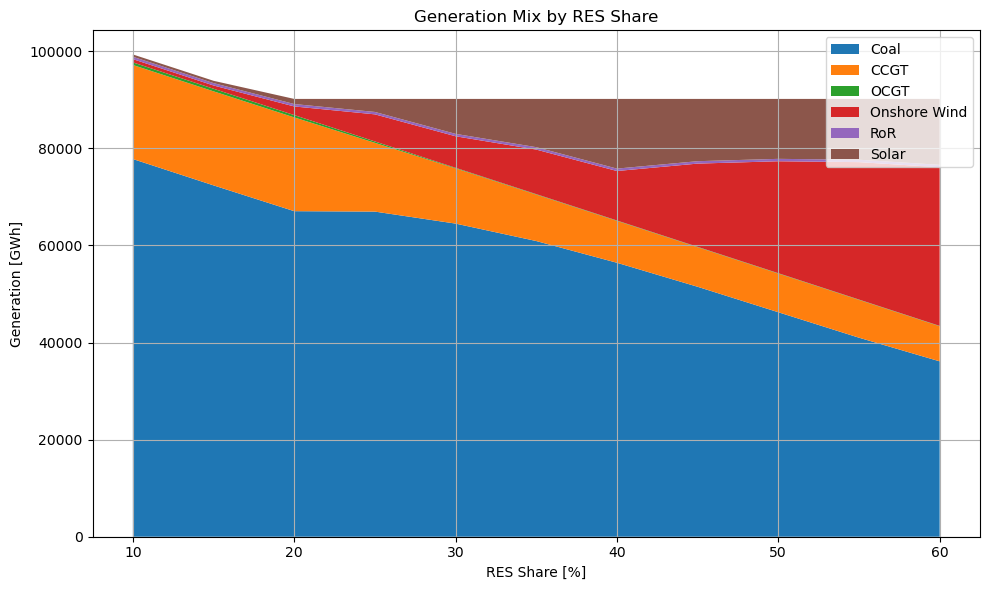

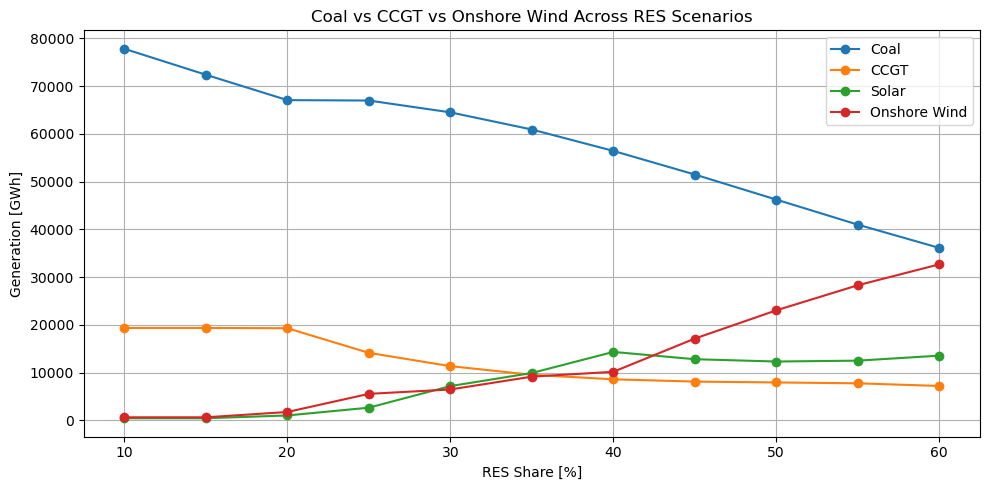

In [2]:
import matplotlib.pyplot as plt

df = df_compare.copy()

df = df.reset_index().rename(columns={'index': 'RES Share'})

df['RES Share Numeric'] = df['RES Share'].str.replace('%', '').astype(float)
df = df.sort_values('RES Share Numeric')

plt.figure(figsize=(10, 6))
plt.stackplot(
    df['RES Share Numeric'],
    df['coal [GWh]'],
    df['CCGT [GWh]'],
    df['OCGT [GWh]'],
    df['onwind [GWh]'],
    df['ror [GWh]'],
    df['solar [GWh]'],
    labels=["Coal", "CCGT", "OCGT", "Onshore Wind", "RoR", "Solar"]
)
plt.xlabel("RES Share [%]")
plt.ylabel("Generation [GWh]")
plt.title("Generation Mix by RES Share")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df['RES Share Numeric'], df['coal [GWh]'], label='Coal', marker='o')
plt.plot(df['RES Share Numeric'], df['CCGT [GWh]'], label='CCGT', marker='o')
plt.plot(df['RES Share Numeric'], df['solar [GWh]'], label='Solar', marker='o')
plt.plot(df['RES Share Numeric'], df['onwind [GWh]'], label='Onshore Wind', marker='o')
plt.xlabel("RES Share [%]")
plt.ylabel("Generation [GWh]")
plt.title("Coal vs CCGT vs Onshore Wind Across RES Scenarios")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

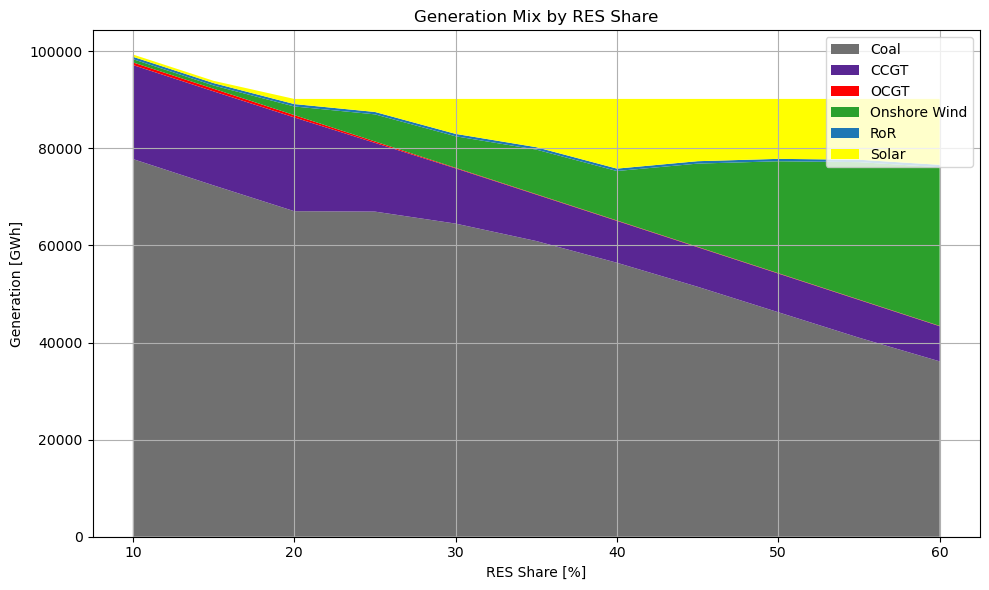

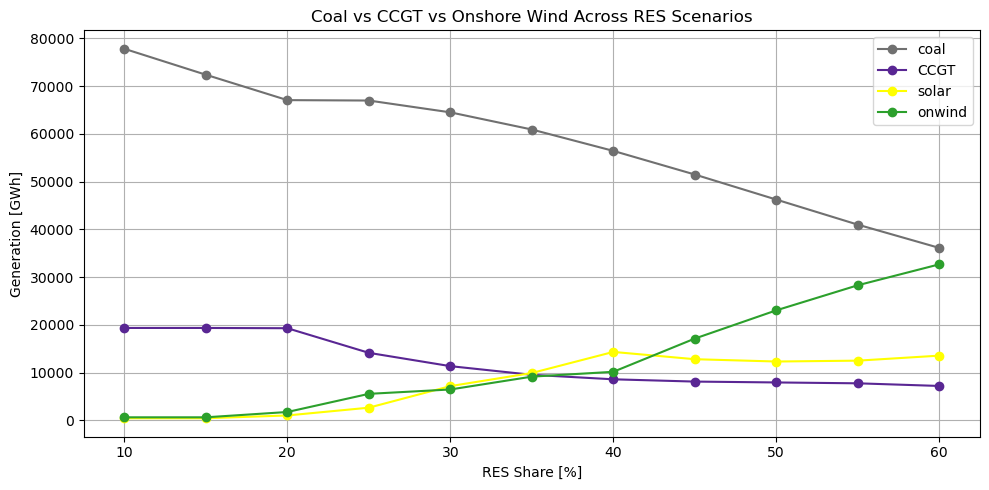

In [4]:
import matplotlib.pyplot as plt

df = df_compare.copy()

df = df.reset_index().rename(columns={'index': 'RES Share'})

df['RES Share Numeric'] = df['RES Share'].str.replace('%', '').astype(float)
df = df.sort_values('RES Share Numeric')

colors = {
    "coal [GWh]": "#707070",     #4B4B4B    # Dark gray
    "CCGT [GWh]": "#592693",         # Blue
    "OCGT [GWh]": "#FF0000",         # Light blue
    "onwind [GWh]": "#2ca02c",       # Green
    "ror [GWh]": "#1f77b4",         # Light green
    "solar [GWh]": "#ffff00",        # Yellow/orange
}

plt.figure(figsize=(10, 6))
plt.stackplot(
    df['RES Share Numeric'],
    df['coal [GWh]'],
    df['CCGT [GWh]'],
    df['OCGT [GWh]'],
    df['onwind [GWh]'],
    df['ror [GWh]'],
    df['solar [GWh]'],
    labels=["Coal", "CCGT", "OCGT", "Onshore Wind", "RoR", "Solar"],
    colors=[colors[col] for col in ["coal [GWh]", "CCGT [GWh]", "OCGT [GWh]", "onwind [GWh]", "ror [GWh]", "solar [GWh]"]]
)
plt.xlabel("RES Share [%]")
plt.ylabel("Generation [GWh]")
plt.title("Generation Mix by RES Share")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
for carrier in ['coal [GWh]', 'CCGT [GWh]', 'solar [GWh]', 'onwind [GWh]']:
    plt.plot(df['RES Share Numeric'], df[carrier], label=carrier.split()[0], marker='o', color=colors[carrier])
plt.xlabel("RES Share [%]")
plt.ylabel("Generation [GWh]")
plt.title("Coal vs CCGT vs Onshore Wind Across RES Scenarios")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setti

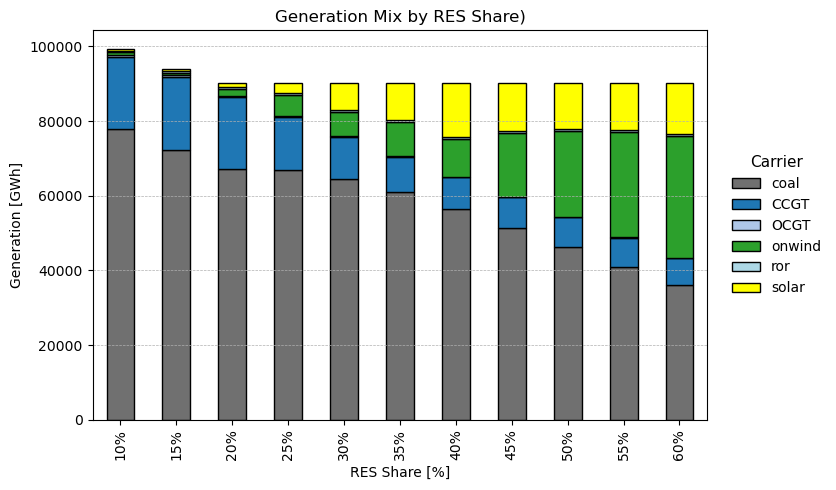

In [ ]:
import os
import pypsa
import pandas as pd
import matplotlib.pyplot as plt

res_levels = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
file_template = "elec_s_14_ec_lv1.0_RES{}-1H_dle.nc"

carrier_set = set()
results = {}

for res in res_levels:
    filename = file_template.format(res)
    if not os.path.exists(filename):
        print(f"File not found: {filename}")
        continue
    n = pypsa.Network(filename)
    carrier_set.update(n.generators.carrier.unique())

columns = ['Load [GWh]', 'Total Generation [GWh]'] + sorted([f"{carrier} [GWh]" for carrier in carrier_set])
df_compare = pd.DataFrame(index=[f"{int(res*100)}%" for res in res_levels], columns=columns)

for res in res_levels:
    filename = file_template.format(res)
    if not os.path.exists(filename):
        continue
    n = pypsa.Network(filename)
    row = f"{int(res*100)}%"

    total_load = n.loads_t.p_set.sum().sum() / 1e3
    df_compare.loc[row, 'Load [GWh]'] = round(total_load, 2)

    total_gen = n.generators_t.p.sum().sum() / 1e3
    df_compare.loc[row, 'Total Generation [GWh]'] = round(total_gen, 2)

    for carrier in carrier_set:
        gen_ids = n.generators[n.generators.carrier == carrier].index
        gen_sum = n.generators_t.p[gen_ids].sum().sum() / 1e3 if not gen_ids.empty else 0.0
        df_compare.loc[row, f"{carrier} [GWh]"] = round(gen_sum, 2)

df_compare = df_compare.fillna(0.0)

df = df_compare.copy().reset_index().rename(columns={'index': 'RES Share'})
df['RES Share Numeric'] = df['RES Share'].str.replace('%', '').astype(float)
df = df.sort_values('RES Share Numeric')
df.set_index('RES Share', inplace=True)

# Color scheme for selected technologies
colors = {
    "coal [GWh]": "#707070",     # dark gray
    "CCGT [GWh]": "#1f77b4",     # blue
    "OCGT [GWh]": "#aec7e8",     # light blue
    "onwind [GWh]": "#2ca02c",   # green
    "ror [GWh]": "#add8e6",      # light green
    "solar [GWh]": "#ffff00",    # yellow
}

# Choose subset for bar plot
selected_carriers = ["coal [GWh]", "CCGT [GWh]", "OCGT [GWh]", "onwind [GWh]", "ror [GWh]", "solar [GWh]"]

# # Plot: Stacked bar chart
# df[selected_carriers].plot(
#     kind='bar',
#     stacked=True,
#     figsize=(12, 6),
#     color=[colors[c] for c in selected_carriers],
#     edgecolor='black'
# )
# plt.xlabel("RES Share [%]")
# plt.ylabel("Generation [GWh]")
# plt.title("Generation Mix by RES Share (Stacked Bar Chart)")
# plt.legend(title="Carrier", loc="upper left")
# plt.grid(axis='y', linestyle='--', linewidth=0.5)
# plt.tight_layout()
# plt.show()

# Plot: Stacked bar chart with legend above

fig, ax = plt.subplots(figsize=(10, 5))  # wide and not too tall

df[selected_carriers].plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=[colors[c] for c in selected_carriers],
    edgecolor='black'
)

plt.xlabel("RES Share [%]")
plt.ylabel("Generation [GWh]")
plt.title("Generation Mix by RES Share)")

clean_labels = [c.replace(" [GWh]", "") for c in selected_carriers]



plt.legend(
    clean_labels,
    title="Carrier",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),  
    frameon=False,
    ncol=1,
    fontsize=10,
    title_fontsize=11
)

plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout(rect=[0, 0, 0.85, 1])  
plt.show()



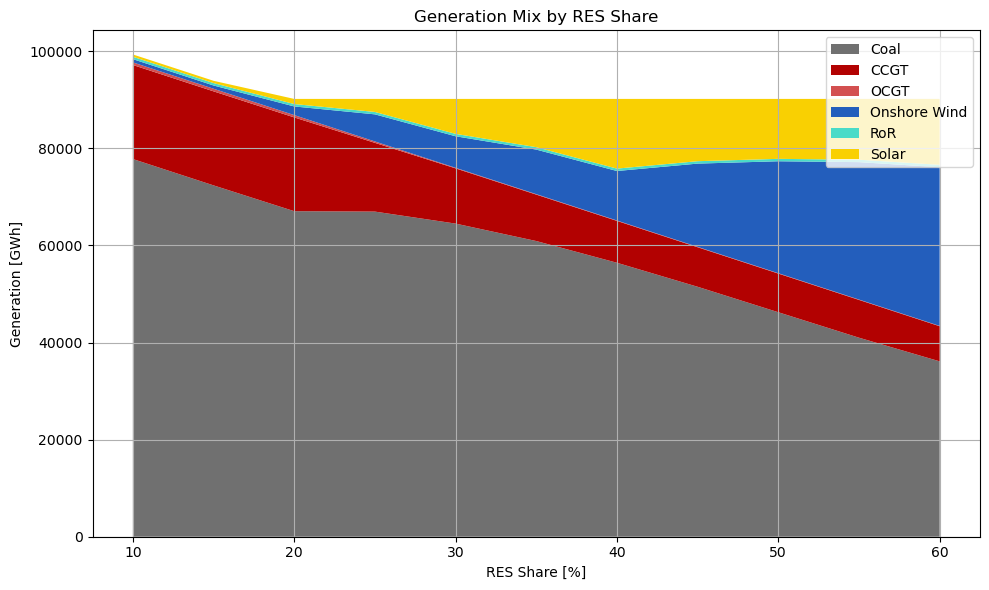

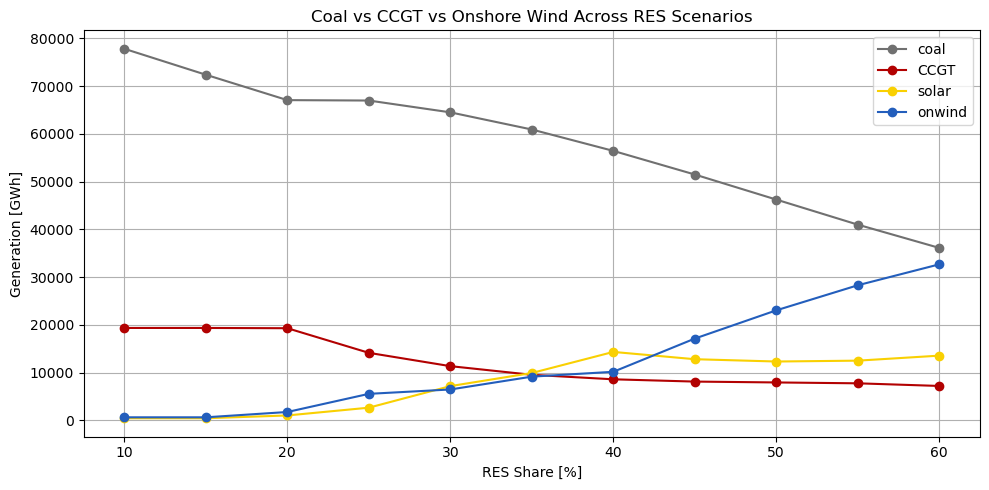

In [ ]:
import matplotlib.pyplot as plt

df = df_compare.copy()

df = df.reset_index().rename(columns={'index': 'RES Share'})

df['RES Share Numeric'] = df['RES Share'].str.replace('%', '').astype(float)
df = df.sort_values('RES Share Numeric')

colors = {
    "coal [GWh]": "#707070",     
    "CCGT [GWh]": "#b20101",        
    "OCGT [GWh]": "#d35050",         
    "onwind [GWh]": "#235ebc",      
    "ror [GWh]": "#4adbc8",     
    "solar [GWh]": "#f9d002",       
}

plt.figure(figsize=(10, 6))
plt.stackplot(
    df['RES Share Numeric'],
    df['coal [GWh]'],
    df['CCGT [GWh]'],
    df['OCGT [GWh]'],
    df['onwind [GWh]'],
    df['ror [GWh]'],
    df['solar [GWh]'],
    labels=["Coal", "CCGT", "OCGT", "Onshore Wind", "RoR", "Solar"],
    colors=[colors[col] for col in ["coal [GWh]", "CCGT [GWh]", "OCGT [GWh]", "onwind [GWh]", "ror [GWh]", "solar [GWh]"]]
)
plt.xlabel("RES Share [%]")
plt.ylabel("Generation [GWh]")
plt.title("Generation Mix by RES Share")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
for carrier in ['coal [GWh]', 'CCGT [GWh]', 'solar [GWh]', 'onwind [GWh]']:
    plt.plot(df['RES Share Numeric'], df[carrier], label=carrier.split()[0], marker='o', color=colors[carrier])
plt.xlabel("RES Share [%]")
plt.ylabel("Generation [GWh]")
plt.title("Coal vs CCGT vs Onshore Wind Across RES Scenarios")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
# Total load
total_load = n.loads_t.p_set.sum().sum()

# Total generation
total_gen = n.generators_t.p.sum().sum()

# Load Shedding?
if "LoadShedding" in n.generators.carrier.unique():
    shedding = n.generators_t.p[n.generators.query("carrier == 'LoadShedding'").index].sum().sum()
    print(f"Total load shedding: {shedding} MWh")

print(f"Load = {total_load/1e3:.2f} GWh")
print(f"Generation = {total_gen/1e3:.2f} GWh")


Load = 108561.30 GWh
Generation = 90180.12 GWh


c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setti

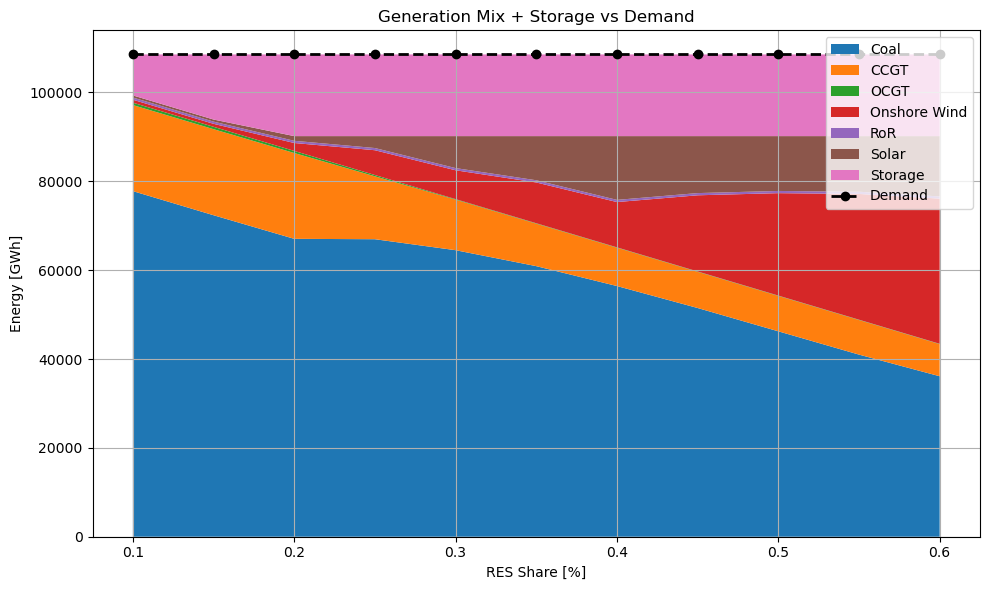

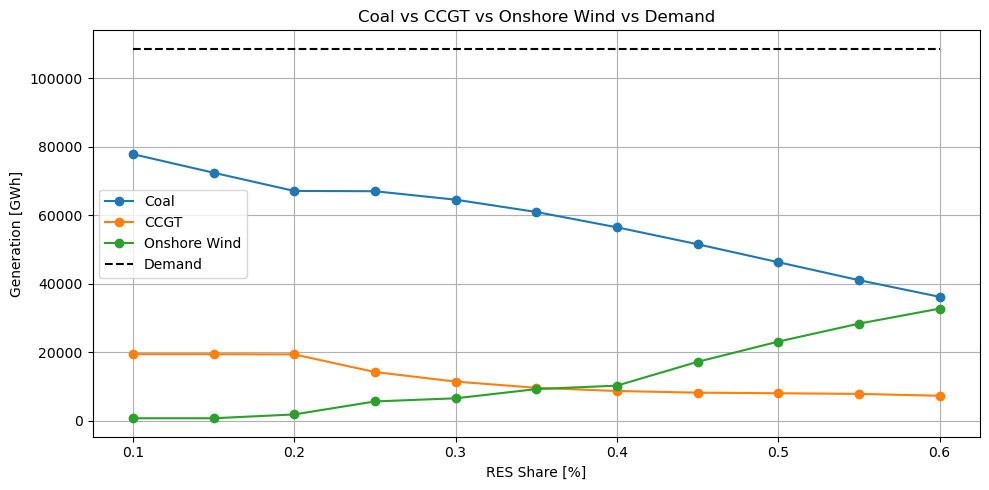

In [ ]:
import os
import pypsa
import pandas as pd
import matplotlib.pyplot as plt

res_levels = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60]
file_template = "elec_s_14_ec_lv1.0_RES{}-1H_dle.nc"

carrier_set = set()
for res in res_levels:
    f = file_template.format(res)
    if os.path.exists(f):
        n = pypsa.Network(f)
        carrier_set.update(n.generators.carrier.unique())

columns = ['Load [GWh]', 'Generator Total [GWh]', 'Storage Discharge [GWh]', 'Effective Supply [GWh]'] + \
          sorted([f"{c} [GWh]" for c in carrier_set])
df_compare = pd.DataFrame(index=[f"RES{res:.2f}" for res in res_levels], columns=columns)

for res in res_levels:
    label = f"RES{res:.2f}"
    file = file_template.format(res)
    if not os.path.exists(file):
        continue
    n = pypsa.Network(file)

    # Total load
    load = n.loads_t.p_set.sum().sum() / 1e3
    df_compare.loc[label, "Load [GWh]"] = round(load, 2)

    # Generator total
    gen_total = n.generators_t.p.sum().sum() / 1e3
    df_compare.loc[label, "Generator Total [GWh]"] = round(gen_total, 2)

    # Storage discharge
    storage_discharge = n.storage_units_t.p.sum().sum() / 1e3
    df_compare.loc[label, "Storage Discharge [GWh]"] = round(storage_discharge, 2)

    # Total supply (generation + storage)
    total_supply = gen_total + storage_discharge
    df_compare.loc[label, "Effective Supply [GWh]"] = round(total_supply, 2)

    # By carrier
    for carrier in carrier_set:
        ids = n.generators[n.generators.carrier == carrier].index
        val = n.generators_t.p[ids].sum().sum() / 1e3 if not ids.empty else 0.0
        df_compare.loc[label, f"{carrier} [GWh]"] = round(val, 2)

df_compare = df_compare.fillna(0.0).copy()
df_compare = df_compare.reset_index().rename(columns={'index': 'RES Share'})
df_compare['RES %'] = df_compare['RES Share'].str.replace('RES', '').astype(float)
df_compare = df_compare.sort_values('RES %')


# Area chart: generation + storage vs demand
plt.figure(figsize=(10, 6))
plt.stackplot(
    df_compare['RES %'],
    df_compare.get('coal [GWh]', 0),
    df_compare.get('CCGT [GWh]', 0),
    df_compare.get('OCGT [GWh]', 0),
    df_compare.get('onwind [GWh]', 0),
    df_compare.get('ror [GWh]', 0),
    df_compare.get('solar [GWh]', 0),
    df_compare.get('Storage Discharge [GWh]', 0),
    labels=["Coal", "CCGT", "OCGT", "Onshore Wind", "RoR", "Solar", "Storage"],
)

plt.plot(df_compare['RES %'], df_compare['Load [GWh]'], 'k--o', label="Demand", linewidth=2)
plt.xlabel("RES Share [%]")
plt.ylabel("Energy [GWh]")
plt.title("Generation Mix + Storage vs Demand")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Line plot: key sources vs RES share
plt.figure(figsize=(10, 5))
plt.plot(df_compare['RES %'], df_compare.get('coal [GWh]', 0), label='Coal', marker='o')
plt.plot(df_compare['RES %'], df_compare.get('CCGT [GWh]', 0), label='CCGT', marker='o')
plt.plot(df_compare['RES %'], df_compare.get('onwind [GWh]', 0), label='Onshore Wind', marker='o')
plt.plot(df_compare['RES %'], df_compare['Load [GWh]'], 'k--', label='Demand')

plt.xlabel("RES Share [%]")
plt.ylabel("Generation [GWh]")
plt.title("Coal vs CCGT vs Onshore Wind vs Demand")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
res = 0.6
file = f"elec_s_14_ec_lv1.0_RES{res}-1H_dle.nc"
n = pypsa.Network(file)
# Hourly values
load = n.loads_t.p_set.sum(axis=1)
gen = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum()
storage = n.storage_units_t.p.sum(axis=1)

#  include only major carriers
selected_carriers = ['coal', 'CCGT', 'OCGT', 'onwind', 'solar', 'ror']
gen = gen[[c for c in selected_carriers if c in gen.columns]]

df_hourly = pd.DataFrame(index=n.snapshots)
df_hourly["Load"] = load
df_hourly["Storage"] = storage
for c in gen.columns:
    df_hourly[c] = gen[c]

df_hourly["Total Supply"] = df_hourly[gen.columns.tolist()].sum(axis=1) + df_hourly["Storage"]

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setti

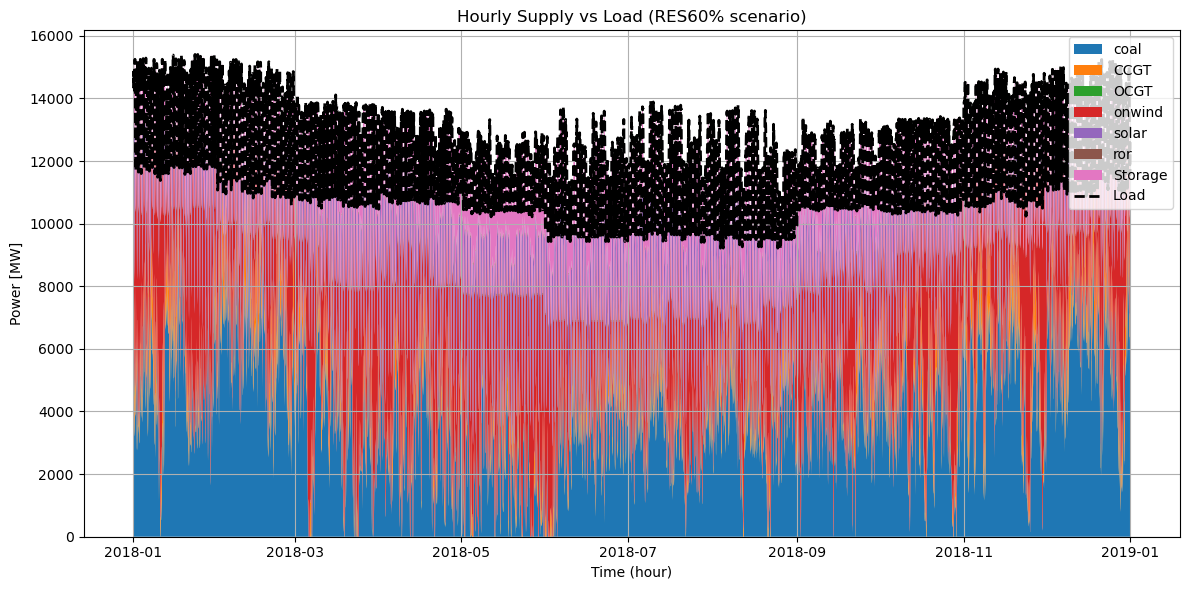

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.stackplot(
    df_hourly.index,
    [df_hourly[c] for c in gen.columns.tolist()] + [df_hourly["Storage"]],
    labels=gen.columns.tolist() + ["Storage"],
)

plt.plot(df_hourly.index, df_hourly["Load"], 'k--', label="Load", linewidth=2)
plt.title(f"Hourly Supply vs Load (RES{res:.0%} scenario)")
plt.xlabel("Time (hour)")
plt.ylabel("Power [MW]")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setti

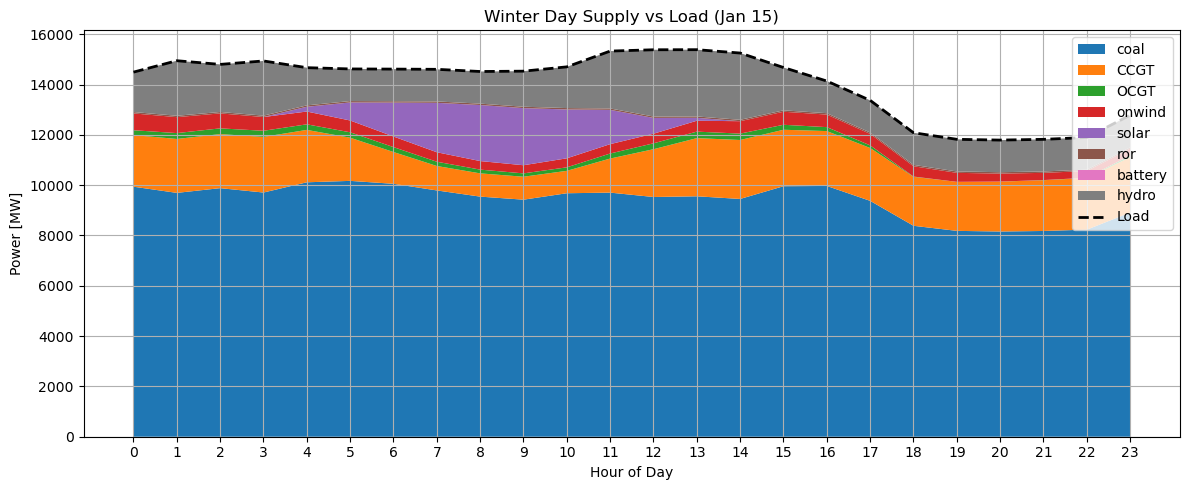

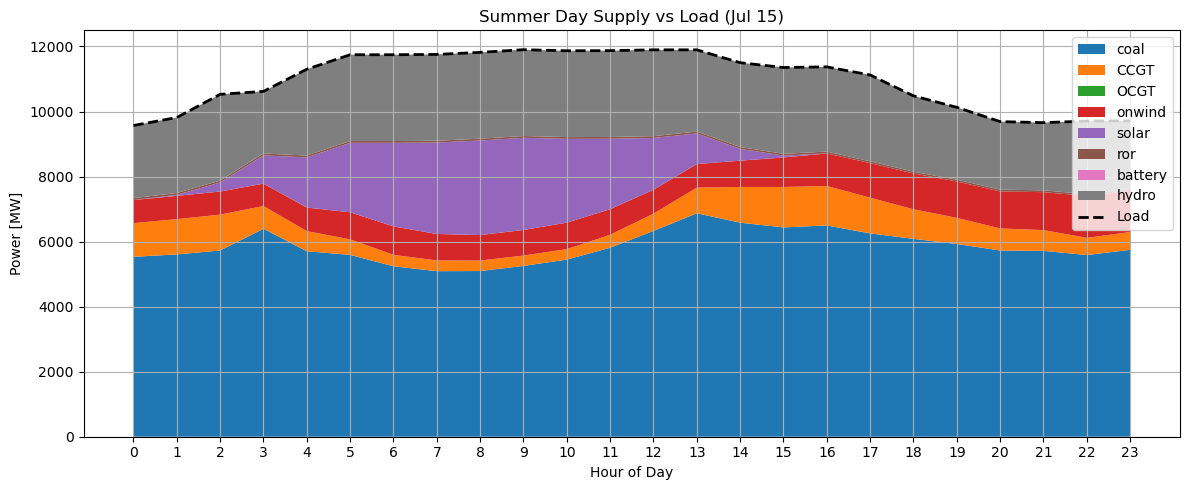

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pypsa  

n = pypsa.Network("elec_s_14_ec_lv1.0_RES0.3-1H_dle.nc")

# target days
winter_day = pd.to_datetime("2018-01-15")
summer_day = pd.to_datetime("2018-07-15")

# Extract hourly snapshots for the selected days
winter_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == winter_day.strftime('%Y-%m-%d')]
summer_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == summer_day.strftime('%Y-%m-%d')]

# Retrieve data
load = n.loads_t.p_set.sum(axis=1)
gen = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum()
storage_gen = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum()

# Define relevant generation and storage carriers
selected_carriers = ['coal', 'CCGT', 'OCGT', 'onwind', 'solar', 'ror']
selected_storages = ['battery', 'hydro']

available_gen = [c for c in selected_carriers if c in gen.columns]
available_storages = [c for c in selected_storages if c in storage_gen.columns]

# Function to prepare daily data
def prepare_day_df(hours):
    df = pd.DataFrame(index=range(24))
    df["Load"] = load.loc[hours].values
    for c in available_gen:
        df[c] = gen[c].loc[hours].values
    for s in available_storages:
        df[s] = storage_gen[s].loc[hours].values
    return df

# Prepare data for each day
df_winter = prepare_day_df(winter_hours)
df_summer = prepare_day_df(summer_hours)

# Plot function
def plot_day(df, title):
    plt.figure(figsize=(12, 5))
    stack = [c for c in df.columns if c != "Load"]
    plt.stackplot(df.index, [df[c] for c in stack], labels=stack)
    plt.plot(df.index, df["Load"], 'k--', linewidth=2, label="Load")
    plt.title(title)
    plt.xlabel("Hour of Day")
    plt.ylabel("Power [MW]")
    plt.xticks(range(0, 24))
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot results
plot_day(df_winter, "Winter Day Supply vs Load (Jan 15)")
plot_day(df_summer, "Summer Day Supply vs Load (Jul 15)")


c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setti

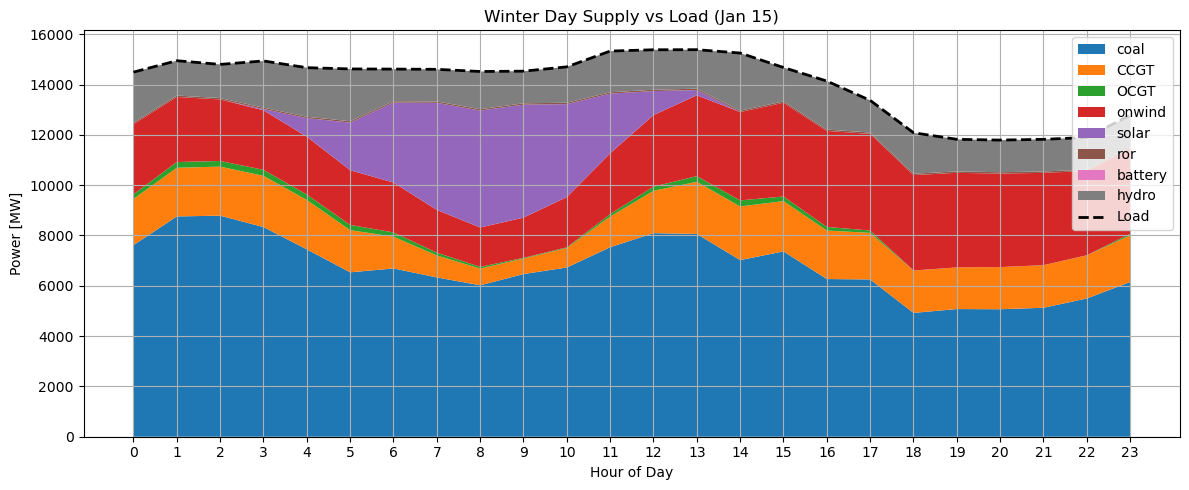

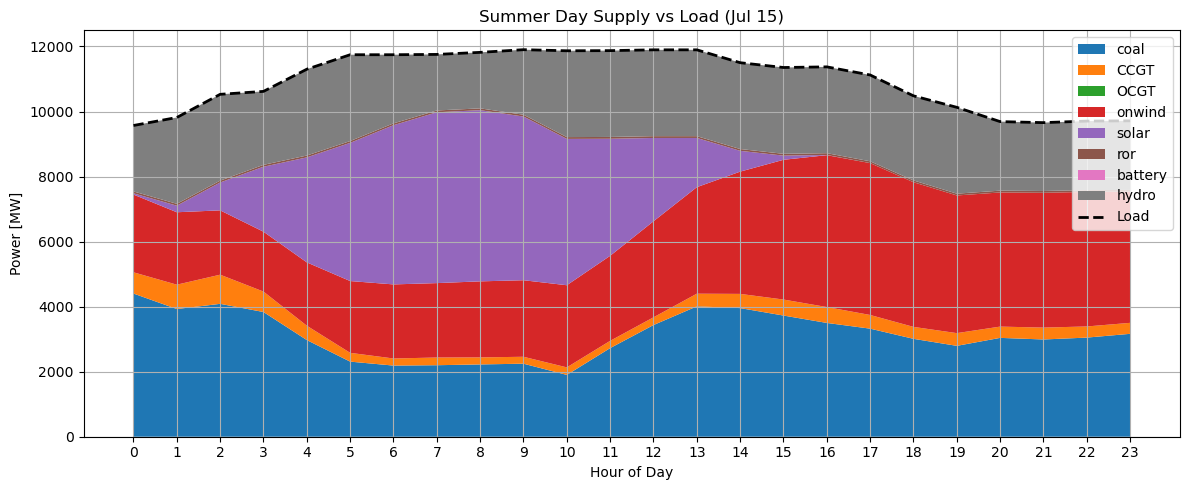

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pypsa 

n = pypsa.Network("elec_s_14_ec_lv1.0_RES0.6-1H_dle.nc")

# Define target days
winter_day = pd.to_datetime("2018-01-15")
summer_day = pd.to_datetime("2018-07-15")

# Extract hourly snapshots for the selected days
winter_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == winter_day.strftime('%Y-%m-%d')]
summer_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == summer_day.strftime('%Y-%m-%d')]

# Retrieve data
load = n.loads_t.p_set.sum(axis=1)
gen = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum()
storage_gen = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum()

# Define relevant generation and storage carriers
selected_carriers = ['coal', 'CCGT', 'OCGT', 'onwind', 'solar', 'ror']
selected_storages = ['battery', 'hydro']

available_gen = [c for c in selected_carriers if c in gen.columns]
available_storages = [c for c in selected_storages if c in storage_gen.columns]

# Function to prepare daily data
def prepare_day_df(hours):
    df = pd.DataFrame(index=range(24))
    df["Load"] = load.loc[hours].values
    for c in available_gen:
        df[c] = gen[c].loc[hours].values
    for s in available_storages:
        df[s] = storage_gen[s].loc[hours].values
    return df

# Prepare data for each day
df_winter = prepare_day_df(winter_hours)
df_summer = prepare_day_df(summer_hours)

# Plot function
def plot_day(df, title):
    plt.figure(figsize=(12, 5))
    stack = [c for c in df.columns if c != "Load"]
    plt.stackplot(df.index, [df[c] for c in stack], labels=stack)
    plt.plot(df.index, df["Load"], 'k--', linewidth=2, label="Load")
    plt.title(title)
    plt.xlabel("Hour of Day")
    plt.ylabel("Power [MW]")
    plt.xticks(range(0, 24))
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot results
plot_day(df_winter, "Winter Day Supply vs Load (Jan 15)")
plot_day(df_summer, "Summer Day Supply vs Load (Jul 15)")


In [5]:
import os
import pypsa
import pandas as pd

# RES levels and file pattern
res_levels = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
file_template = "elec_s_14_ec_lv1.0_RES{}-1H_dle.nc"

# Initialize table
table = []

for res in res_levels:
    label = f"RES{res:.2f}"
    file_path = file_template.format(res)
    if not os.path.exists(file_path):
        print(f"Skipping {label} — file not found.")
        continue

    n = pypsa.Network(file_path)

    # Total demand
    demand = n.loads_t.p_set.sum().sum() / 1e3  # GWh

    # Generator output
    gen_total = n.generators_t.p.sum().sum() / 1e3  # GWh

    # Storage discharge
    storage_discharge = n.storage_units_t.p.clip(lower=0).sum().sum() / 1e3  # GWh

    # Storage charging (negative power flows on links)
    battery_charge = 0.0
    h2_charge = 0.0

    if "battery charger" in n.links.carrier.unique():
        battery_ids = n.links[n.links.carrier == "battery charger"].index
        valid_battery_ids = battery_ids.intersection(n.links_t.p0.columns)
        battery_charge = n.links_t.p0.loc[:, valid_battery_ids].clip(upper=0).abs().sum().sum() / 1e3

    if "H2 electrolysis" in n.links.carrier.unique():
        h2_ids = n.links[n.links.carrier == "H2 electrolysis"].index
        valid_h2_ids = h2_ids.intersection(n.links_t.p0.columns)
        h2_charge = n.links_t.p0.loc[:, valid_h2_ids].clip(upper=0).abs().sum().sum() / 1e3


    total_charging = battery_charge + h2_charge

    # Link exports
    exports = 0.0
    link_mask = n.links.bus0.str.contains("border|export|ext", case=False, na=False)
    export_ids = n.links[link_mask].index
    valid_export_ids = export_ids.intersection(n.links_t.p0.columns)

    if not valid_export_ids.empty:
        exports = n.links_t.p0.loc[:, valid_export_ids].clip(lower=0).sum().sum() / 1e3

    # Line losses
    line_losses = n.lines_t.p0.add(n.lines_t.p1, fill_value=0).abs().sum().sum() / 2 / 1e3

    # Delivered energy (gen + discharge)
    delivered = gen_total + storage_discharge

    # Optional: Curtailment estimate
    available = n.generators_t.p_max_pu.multiply(n.generators.p_nom, axis=1).sum().sum() / 1e3
    curtailment = max(0.0, available - n.generators_t.p.sum().sum() / 1e3) if available > 0 else 0.0

    table.append({
        "RES": res,
        "Demand [GWh]": round(demand, 2),
        "Generator Output [GWh]": round(gen_total, 2),
        "Storage Discharge [GWh]": round(storage_discharge, 2),
        "Delivered Energy [GWh]": round(delivered, 2),
        "Storage Charging [GWh]": round(total_charging, 2),
        "Line Losses [GWh]": round(line_losses, 2),
        "Exports [GWh]": round(exports, 2),
        "RES Available [GWh]": round(available, 2),
        "Curtailment [GWh]": round(curtailment, 2),
        "Supply - Demand Balance [GWh]": round(delivered - demand, 2),
    })

# Create DataFrame
df_summary = pd.DataFrame(table).sort_values("RES").reset_index(drop=True)
df_summary

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setti

RES  Demand [GWh]  Generator Output [GWh]  Storage Discharge [GWh]  \
0   0.10      108561.3                99339.77                  9221.53   
1   0.15      108561.3                93911.71                 14649.59   
2   0.20      108561.3                90180.12                 18381.18   
3   0.25      108561.3                90180.12                 18381.18   
4   0.30      108561.3                90180.12                 18381.18   
5   0.35      108561.3                90180.12                 18381.18   
6   0.40      108561.3                90180.12                 18381.18   
7   0.45      108561.3                90180.12                 18381.18   
8   0.50      108561.3                90180.12                 18381.18   
9   0.55      108561.3                90180.12                 18381.18   
10  0.60      108561.3                90180.12                 18381.18   

    Delivered Energy [GWh]  Storage Charging [GWh]  Line Losses [GWh]  \
0                 108561.3                     0.0                0.0   
1                 108561.3                     0.0                0.0   
2                 108561.3                     0.0                0.0   
3                 108561.3                     0.0                0.0   
4                 108561.3                     0.0                0.0   
5                 108561.3                     0.0                0.0   
6                 108561.3                     0.0                0.0   
7                 108561.3                     0.0                0.0   
8                 108561.3                     0.0                0.0   
9                 108561.3                     0.0                0.0   
10                108561.3                     0.0                0.0   

    Exports [GWh]  RES Available [GWh]  Curtailment [GWh]  \
0             0.0              2733.27                0.0   
1             0.0              2733.27                0.0   
2             0.0              2733.27                0.0   
3             0.0              2733.27                0.0   
4             0.0              2733.27                0.0   
5             0.0              2733.27                0.0   
6             0.0              2733.27                0.0   
7             0.0              2733.27                0.0   
8             0.0              2733.27                0.0   
9             0.0              2733.27                0.0   
10            0.0              2733.27                0.0   

    Supply - Demand Balance [GWh]  
0                            -0.0  
1                            -0.0  
2                            -0.0  
3                            -0.0  
4                            -0.0  
5                            -0.0  
6                            -0.0  
7                            -0.0  
8                            -0.0  
9                            -0.0  
10                           -0.0

Processing: elec_s_14_ec_lv1.0_RES0.1-1H_dle.nc


c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setti

Processing: elec_s_14_ec_lv1.0_RES0.15-1H_dle.nc


INFO:pypsa.io:Imported network elec_s_14_ec_lv1.0_RES0.15-1H_dle.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with floa

Processing: elec_s_14_ec_lv1.0_RES0.2-1H_dle.nc


INFO:pypsa.io:Imported network elec_s_14_ec_lv1.0_RES0.2-1H_dle.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float

Processing: elec_s_14_ec_lv1.0_RES0.25-1H_dle.nc


INFO:pypsa.io:Imported network elec_s_14_ec_lv1.0_RES0.25-1H_dle.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with floa

Processing: elec_s_14_ec_lv1.0_RES0.3-1H_dle.nc


INFO:pypsa.io:Imported network elec_s_14_ec_lv1.0_RES0.3-1H_dle.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float

Processing: elec_s_14_ec_lv1.0_RES0.35-1H_dle.nc


INFO:pypsa.io:Imported network elec_s_14_ec_lv1.0_RES0.35-1H_dle.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with floa

Processing: elec_s_14_ec_lv1.0_RES0.4-1H_dle.nc


INFO:pypsa.io:Imported network elec_s_14_ec_lv1.0_RES0.4-1H_dle.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float

Processing: elec_s_14_ec_lv1.0_RES0.45-1H_dle.nc


INFO:pypsa.io:Imported network elec_s_14_ec_lv1.0_RES0.45-1H_dle.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with floa

Processing: elec_s_14_ec_lv1.0_RES0.5-1H_dle.nc


INFO:pypsa.io:Imported network elec_s_14_ec_lv1.0_RES0.5-1H_dle.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float

Processing: elec_s_14_ec_lv1.0_RES0.55-1H_dle.nc


INFO:pypsa.io:Imported network elec_s_14_ec_lv1.0_RES0.55-1H_dle.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with floa

Processing: elec_s_14_ec_lv1.0_RES0.6-1H_dle.nc


INFO:pypsa.io:Imported network elec_s_14_ec_lv1.0_RES0.6-1H_dle.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores



Correlation between Thermal Generation and Thermal Ramping: -0.928
Correlation between RES Generation and RES Ramping: 0.982


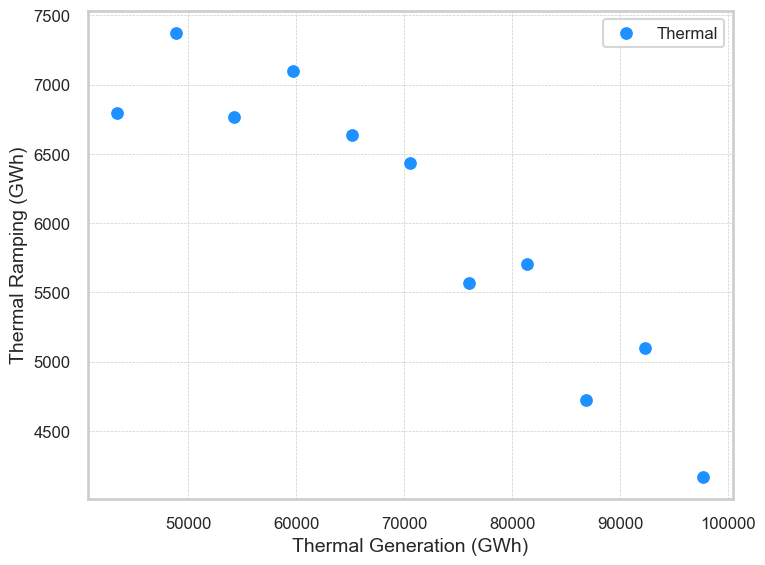

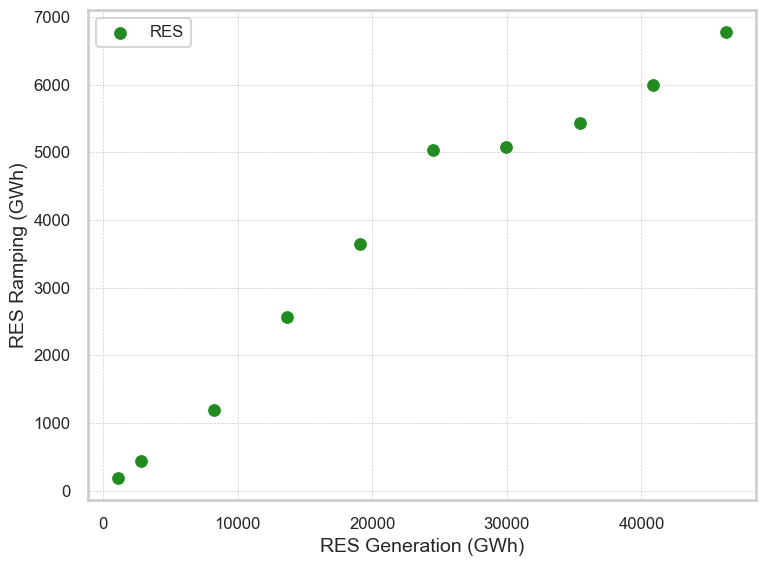

In [12]:
import os
import pypsa
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Setup
output_dir = os.getcwd()
res_levels = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]

results = {
    "res_share": [],
    "thermal_ramping": [],
    "res_ramping": [],
    "thermal_gen": [],
    "res_gen": []
}

for res in res_levels:
    filename = f"elec_s_14_ec_lv1.0_RES{res}-1H_dle.nc"
    filepath = os.path.join(output_dir, filename)

    if os.path.exists(filepath):
        print(f"Processing: {filename}")
        network = pypsa.Network(filepath)

        results["res_share"].append(res)

        # --- THERMAL ---
        thermal_gens = network.generators[~network.generators.carrier.isin(["onwind", "offwind-ac", "offwind-dc", "solar", "ror"])]
        thermal_names = thermal_gens.index
        thermal_p = network.generators_t.p[thermal_names]

        # Convert MWh to GWh and round to integer
        results["thermal_gen"].append(int(thermal_p.sum().sum() / 1000))
        results["thermal_ramping"].append(int(thermal_p.diff().abs().sum().sum() / 1000))

        # --- RES ---
        res_gens = network.generators[network.generators.carrier.isin(["onwind", "offwind-ac", "solar"])]
        res_names = res_gens.index
        res_p = network.generators_t.p[res_names]

        results["res_gen"].append(int(res_p.sum().sum() / 1000))
        results["res_ramping"].append(int(res_p.diff().abs().sum().sum() / 1000))

    else:
        print(f"File not found: {filename}")

# Convert to DataFrame
df = pd.DataFrame(results)

# --- CORRELATION COEFFICIENTS ---
thermal_corr = df["thermal_gen"].corr(df["thermal_ramping"])
res_corr = df["res_gen"].corr(df["res_ramping"])

print(f"\nCorrelation between Thermal Generation and Thermal Ramping: {thermal_corr:.3f}")
print(f"Correlation between RES Generation and RES Ramping: {res_corr:.3f}")

# --- PLOTTING ---

sns.set(style="whitegrid", context="talk")

# Thermal Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["thermal_gen"], y=df["thermal_ramping"], color='dodgerblue', s=100, label='Thermal')
plt.xlabel("Thermal Generation (GWh)", fontsize=14)
plt.ylabel("Thermal Ramping (GWh)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# RES Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["res_gen"], y=df["res_ramping"], color='forestgreen', s=100, label='RES')
plt.xlabel("RES Generation (GWh)", fontsize=14)
plt.ylabel("RES Ramping (GWh)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [2]:
import os
import pypsa
import pandas as pd

# RES scenario levels
res_levels = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
file_template = "elec_s_14_ec_lv1.0_RES{}-1H_dle.nc"

# Renewable carriers
res_carriers = ["solar", "onwind", "offwind-ac", "offwind-dc", "ror", "hydro"]

regional_generation = {}

for res in res_levels:
    filename = file_template.format(res)
    if not os.path.exists(filename):
        print(f"Missing: {filename}")
        continue

    n = pypsa.Network(filename)
    gen_by_bus = pd.DataFrame(0.0, index=n.buses.index, columns=res_carriers)

    for carrier in res_carriers:
        gens = n.generators[n.generators.carrier == carrier]
        if gens.empty:
            continue
        generation = n.generators_t.p[gens.index].sum(axis=0) / 1e3  # to GWh
        for gen in gens.index:
            bus = gens.loc[gen, 'bus']
            gen_by_bus.loc[bus, carrier] += generation[gen]

    regional_generation[f"{int(res*100)}%"] = gen_by_bus.sum(axis=1)

df_res_by_region = pd.DataFrame(regional_generation)
print(df_res_by_region)


c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setti

                           10%         15%         20%          25%  \
Bus                                                                   
KZ.10_1_AC            0.000000    0.000000  132.096450   132.096450   
KZ.11_1_AC          103.385000  103.385000  103.385000   103.385000   
KZ.12_1_AC          482.226184  482.226184  482.226184  2098.416238   
KZ.13_1_AC            0.000000    0.000000    0.000000     0.000000   
KZ.14_1_AC          146.495557  146.495557  146.495557   146.495557   
KZ.1_1_AC           317.988000  317.988000  580.097790   580.097790   
KZ.2_1_AC             0.000000    0.000000  345.525976   345.525976   
KZ.3_1_AC             0.000000    0.000000    0.000000     0.000000   
KZ.4_1_AC           300.028689  300.028689  419.375770   976.977987   
KZ.5_1_AC            17.520000   17.520000  458.921858   458.921858   
KZ.6_1_AC           137.686047  137.686047  137.686047  3391.958777   
KZ.7_1_AC             8.208665    8.208665   35.056758    35.056758   
KZ.8_1

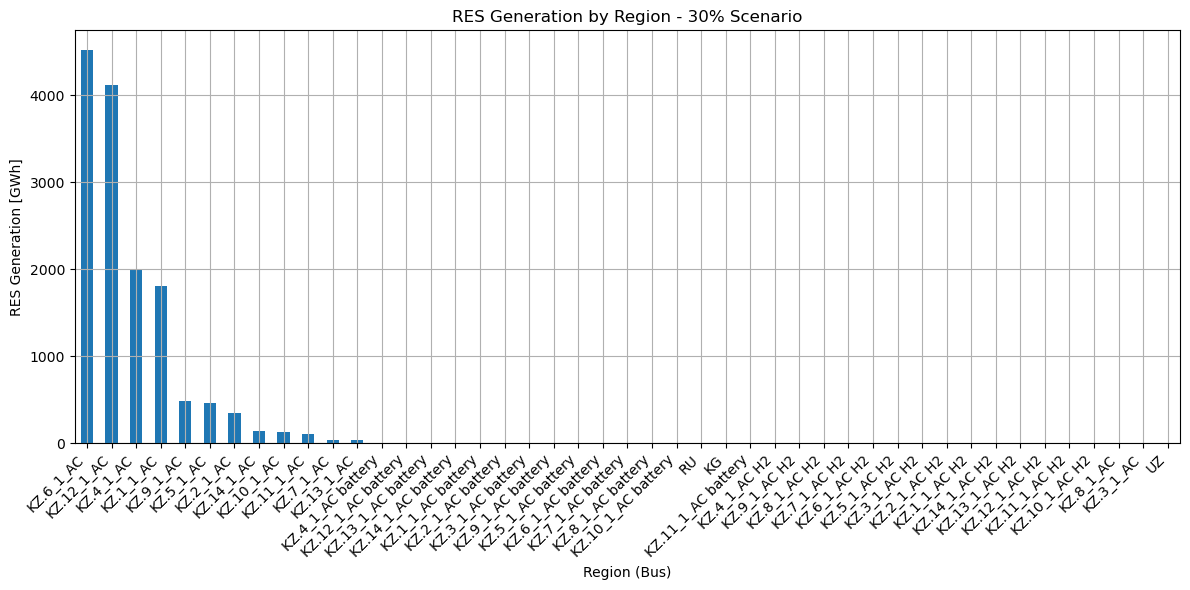

In [3]:
import matplotlib.pyplot as plt

scenario_key = "30%"  # Change to any other scenario as needed
if scenario_key in df_res_by_region.columns:
    plt.figure(figsize=(12, 6))
    df_res_by_region[scenario_key].sort_values(ascending=False).plot(kind='bar')
    plt.title(f"RES Generation by Region - {scenario_key} Scenario")
    plt.xlabel("Region (Bus)")
    plt.ylabel("RES Generation [GWh]")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(True)
    plt.show()
else:
    print(f"No data available for {scenario_key} scenario.")


c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\networkclustering.py:16: UserWarning:

The namespace `pypsa.networkclustering` is deprecated and will be removed in PyPSA v0.24. Please use `pypsa.clustering.spatial instead`. 

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and wil

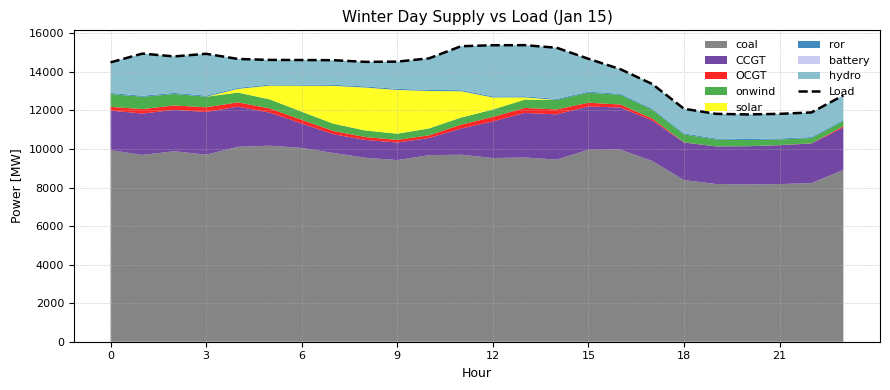

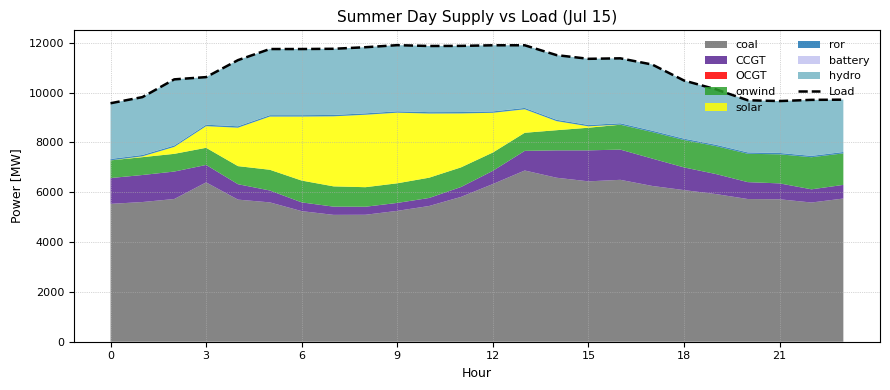

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pypsa  

# Load the network
n = pypsa.Network("elec_s_14_ec_lv1.0_RES0.3-1H_dle.nc")

# Define days
winter_day = pd.to_datetime("2018-01-15")
summer_day = pd.to_datetime("2018-07-15")

# Extract hourly snapshots for the selected days
winter_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == winter_day.strftime('%Y-%m-%d')]
summer_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == summer_day.strftime('%Y-%m-%d')]

# Retrieve power data
load = n.loads_t.p_set.sum(axis=1)
gen = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum()
storage_gen = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum()

# Define included generation and storage carriers
selected_carriers = ['coal', 'CCGT', 'OCGT', 'onwind', 'solar', 'ror']
selected_storages = ['battery', 'hydro']

available_gen = [c for c in selected_carriers if c in gen.columns]
available_storages = [c for c in selected_storages if c in storage_gen.columns]

# Combine all available for plotting
all_sources = available_gen + available_storages

# Custom color map
color_map = {
    "coal": "#707070",     # Dark gray
    "CCGT": "#592693",     # Blue
    "OCGT": "#FF0000",     # Red
    "onwind": "#2ca02c",   # Green
    "ror": "#1f77b4",      # Blue-green
    "solar": "#ffff00",    # Yellow
    "battery": "#c2c2f0",  # Light purple
    "hydro": "#76b5c5"     # Light blue
}

# Prepare daily data
def prepare_day_df(hours):
    df = pd.DataFrame(index=range(24))
    df["Load"] = load.loc[hours].values
    for c in available_gen:
        df[c] = gen[c].loc[hours].values
    for s in available_storages:
        df[s] = storage_gen[s].loc[hours].values
    return df

# Compact and color-aware plotting function
def plot_day(df, title):
    plt.figure(figsize=(9, 4))
    stack = [c for c in df.columns if c != "Load"]
    colors = [color_map.get(c, "#cccccc") for c in stack]
    
    plt.stackplot(df.index, [df[c] for c in stack], labels=stack, colors=colors, alpha=0.85)
    plt.plot(df.index, df["Load"], 'k--', linewidth=1.8, label="Load")

    plt.title(title, fontsize=11)
    plt.xlabel("Hour", fontsize=9)
    plt.ylabel("Power [MW]", fontsize=9)
    plt.xticks(range(0, 24, 3), fontsize=8)
    plt.yticks(fontsize=8)
    plt.legend(loc='upper right', fontsize=8, ncol=2, frameon=False)
    plt.grid(True, linestyle=':', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Generate and plot data for both days
df_winter = prepare_day_df(winter_hours)
df_summer = prepare_day_df(summer_hours)

plot_day(df_winter, "Winter Day Supply vs Load (Jan 15)")
plot_day(df_summer, "Summer Day Supply vs Load (Jul 15)")


c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setti

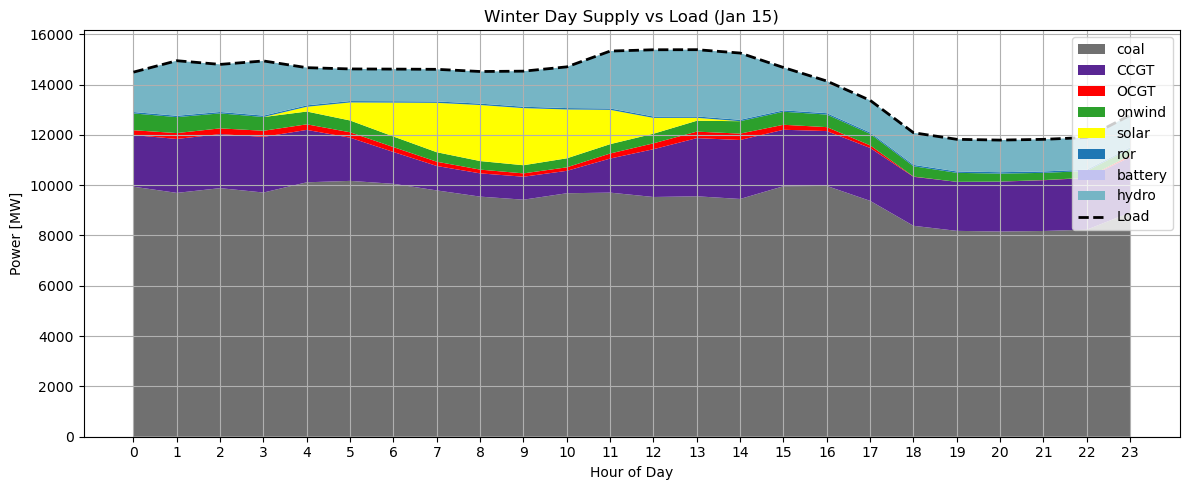

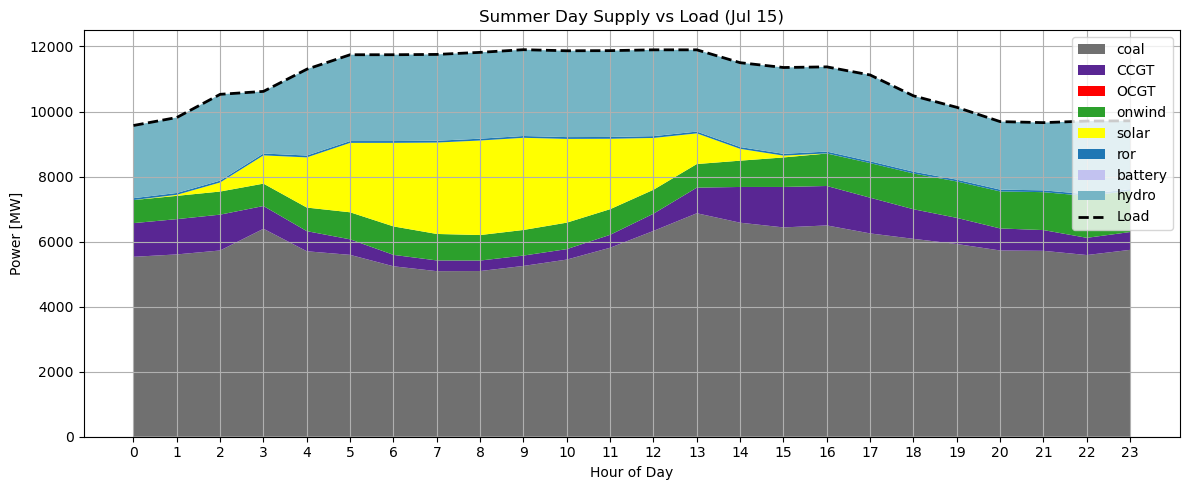

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pypsa  

# Load network
n = pypsa.Network("elec_s_14_ec_lv1.0_RES0.3-1H_dle.nc")

# Define days
winter_day = pd.to_datetime("2018-01-15")
summer_day = pd.to_datetime("2018-07-15")

# Extract hourly snapshots for the selected days
winter_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == winter_day.strftime('%Y-%m-%d')]
summer_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == summer_day.strftime('%Y-%m-%d')]

# Retrieve data
load = n.loads_t.p_set.sum(axis=1)
gen = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum()
storage_gen = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum()

# Define relevant generation and storage carriers
selected_carriers = ['coal', 'CCGT', 'OCGT', 'onwind', 'solar', 'ror']
selected_storages = ['battery', 'hydro']

available_gen = [c for c in selected_carriers if c in gen.columns]
available_storages = [c for c in selected_storages if c in storage_gen.columns]

# Color map
color_map = {
    "coal": "#707070",     # Dark gray
    "CCGT": "#592693",     # Purple
    "OCGT": "#FF0000",     # Red
    "onwind": "#2ca02c",   # Green
    "ror": "#1f77b4",      # Light green
    "solar": "#ffff00",    # Yellow
    "battery": "#c2c2f0",
    "hydro": "#76b5c5"
}

# Function to prepare daily data
def prepare_day_df(hours):
    df = pd.DataFrame(index=range(24))
    df["Load"] = load.loc[hours].values
    for c in available_gen:
        df[c] = gen[c].loc[hours].values
    for s in available_storages:
        df[s] = storage_gen[s].loc[hours].values
    return df

# Plot function
def plot_day(df, title):
    plt.figure(figsize=(12, 5))
    stack = [c for c in df.columns if c != "Load"]
    colors = [color_map.get(c, "#cccccc") for c in stack]
    plt.stackplot(df.index, [df[c] for c in stack], labels=stack, colors=colors)
    plt.plot(df.index, df["Load"], 'k--', linewidth=2, label="Load")
    plt.title(title)
    plt.xlabel("Hour of Day")
    plt.ylabel("Power [MW]")
    plt.xticks(range(0, 24))
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot results
df_winter = prepare_day_df(winter_hours)
df_summer = prepare_day_df(summer_hours)

plot_day(df_winter, "Winter Day Supply vs Load (Jan 15)")
plot_day(df_summer, "Summer Day Supply vs Load (Jul 15)")


c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setti

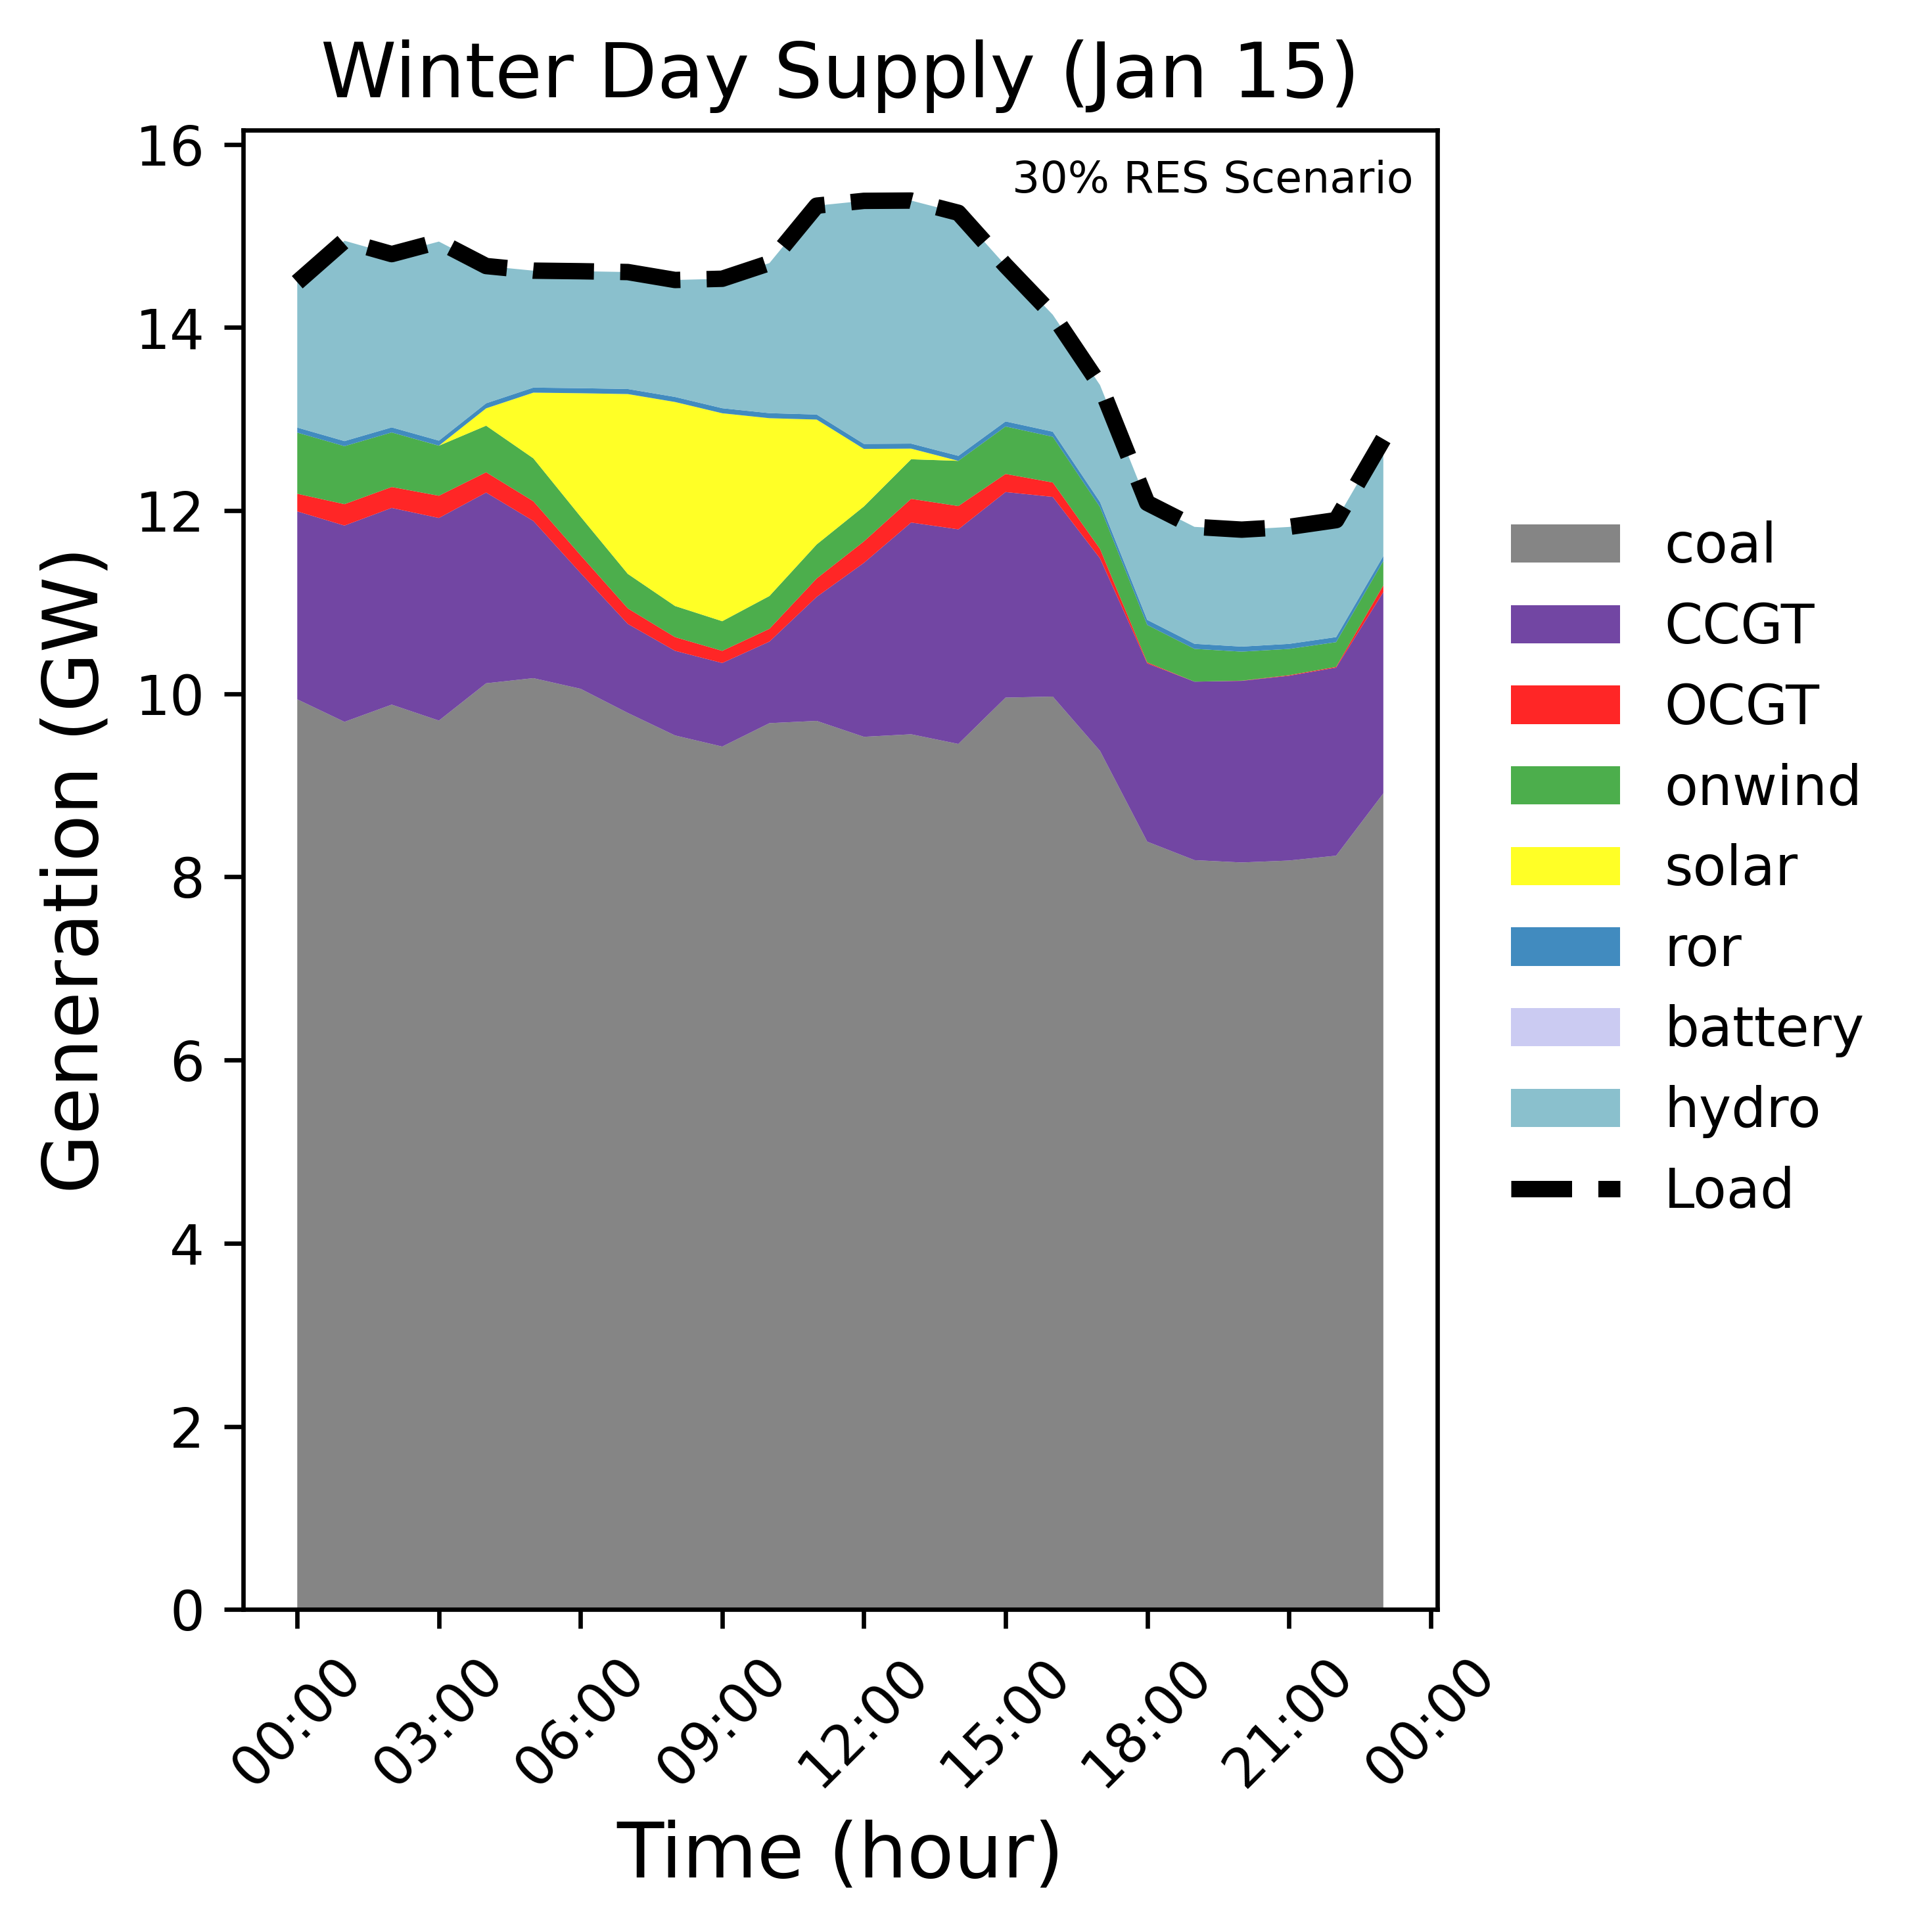

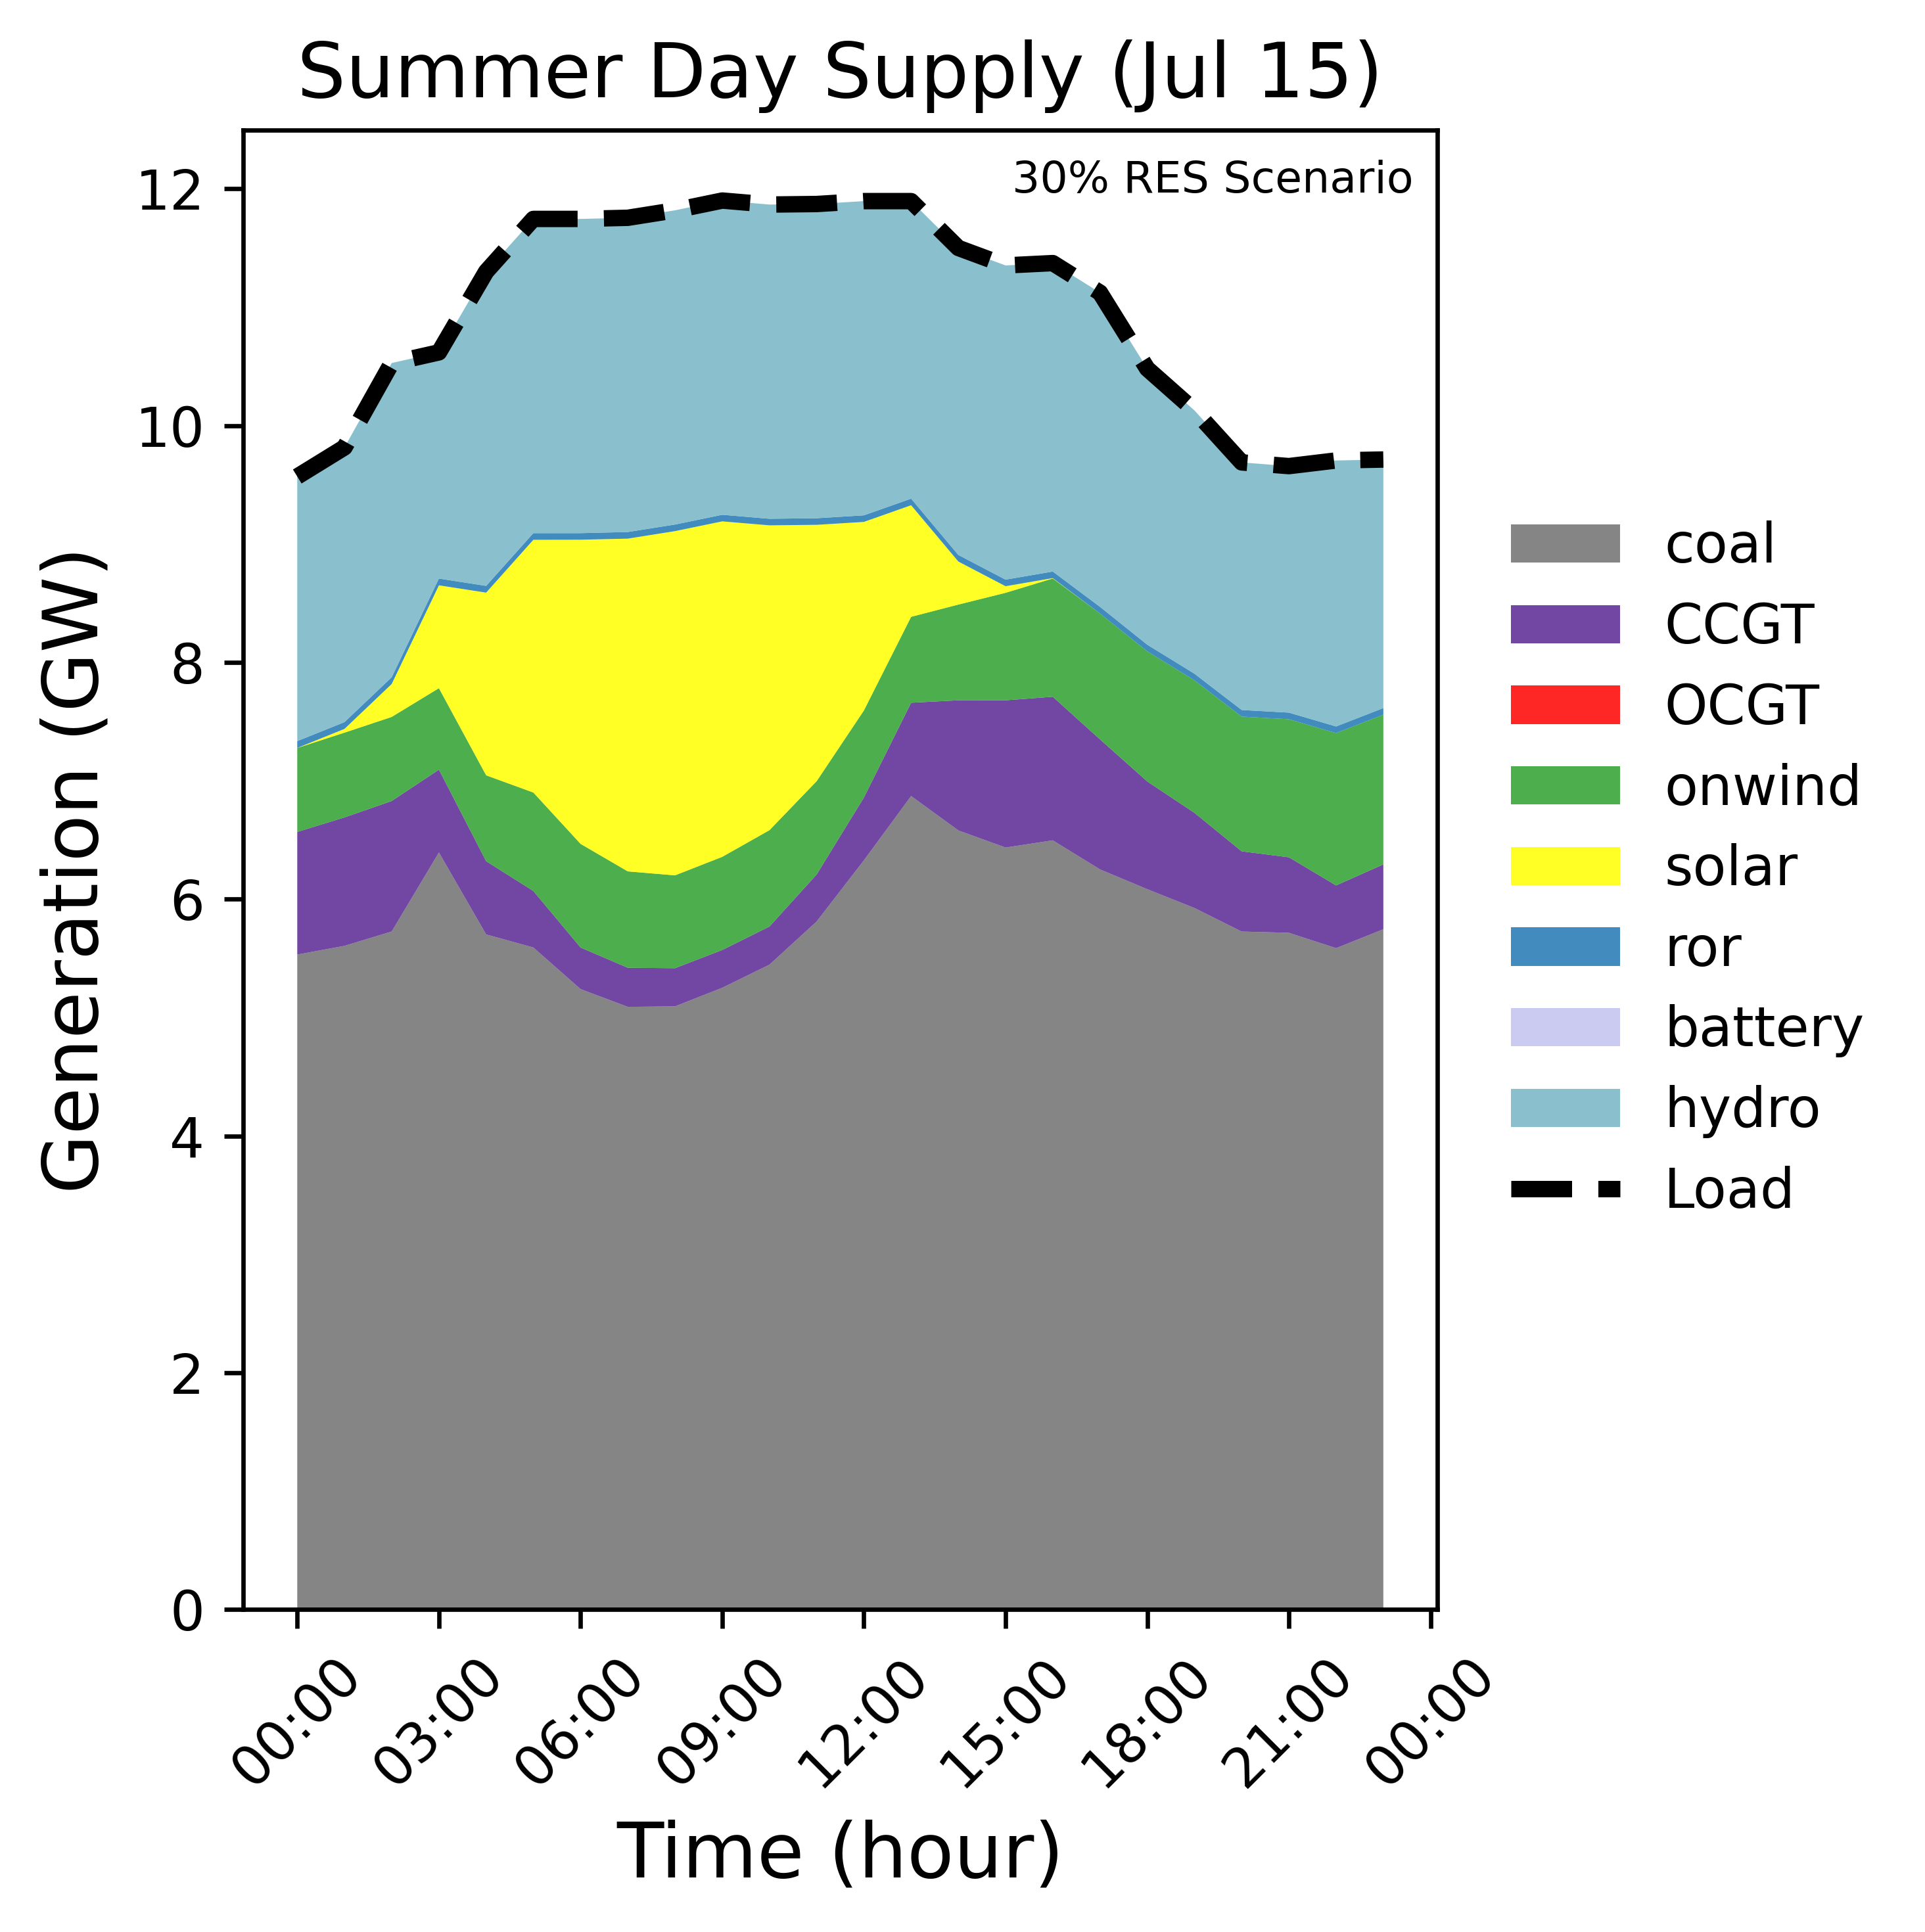

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import pandas as pd
import pypsa

mpl.rcParams['figure.dpi'] = 600  # High-resolution figure

# Load the network
n = pypsa.Network("elec_s_14_ec_lv1.0_RES0.3-1H_dle.nc")

# Target days
winter_day = pd.to_datetime("2018-01-15")
summer_day = pd.to_datetime("2018-07-15")

# Extract hourly snapshots
winter_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == winter_day.strftime('%Y-%m-%d')]
summer_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == summer_day.strftime('%Y-%m-%d')]

# Retrieve data
load = n.loads_t.p_set.sum(axis=1)
gen = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum()
storage_gen = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum()

# Define carriers to include
selected_carriers = ['coal', 'CCGT', 'OCGT', 'onwind', 'solar', 'ror']
selected_storages = ['battery', 'hydro']
available_gen = [c for c in selected_carriers if c in gen.columns]
available_storages = [c for c in selected_storages if c in storage_gen.columns]

# Color map
color_map = {
    "coal": "#707070",     # Dark gray
    "CCGT": "#592693",     # Purple
    "OCGT": "#FF0000",     # Red
    "onwind": "#2ca02c",   # Green
    "ror": "#1f77b4",      # Blue-green
    "solar": "#ffff00",    # Yellow
    "battery": "#c2c2f0",  # Light purple
    "hydro": "#76b5c5"     # Light blue
}

# Prepare daily dataframe
def prepare_day_df(hours):
    df = pd.DataFrame(index=hours)
    df["Load"] = load.loc[hours].values
    for c in available_gen:
        df[c] = gen[c].loc[hours].values
    for s in available_storages:
        df[s] = storage_gen[s].loc[hours].values
    return df

# Plotting function with enhanced graph formatting
def plot_day(df, title):
    fig, ax = plt.subplots(figsize=(5, 5))
    stack = [c for c in df.columns if c != "Load"]
    colors = [color_map.get(c, "#cccccc") for c in stack]

    ax.stackplot(df.index, [df[c] for c in stack], labels=stack, colors=colors, alpha=0.85)
    line1, = ax.plot(df.index, df["Load"], '--', color='black', linewidth=3, label="Load", zorder=10)

    # Time axis formatting
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.xticks(rotation=45)

    # Y-axis formatting
    scale_y = 1e3
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / scale_y)))

    ax.set_ylabel('Generation (GW)', fontsize=14)
    ax.set_xlabel('Time (hour)', fontsize=14)
    ax.set_title(title, fontsize=14)
    # ax.set_title(f"{title}\n(30% Renewable Energy Scenario)", fontsize=14)


    ax.set_facecolor('white')
    plt.grid(False)
    # plt.legend(loc='upper right', fontsize=8)
    ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10, frameon=False)
    plt.tight_layout()
    ax.text(
        0.98, 0.98,
        "30% RES Scenario",
        transform=ax.transAxes,
        fontsize=8,
        ha='right',
        va='top',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)
    )
    plt.show()

# Prepare and plot
df_winter = prepare_day_df(winter_hours)
df_summer = prepare_day_df(summer_hours)

plot_day(df_winter, "Winter Day Supply (Jan 15)")
plot_day(df_summer, "Summer Day Supply (Jul 15)")


c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setti

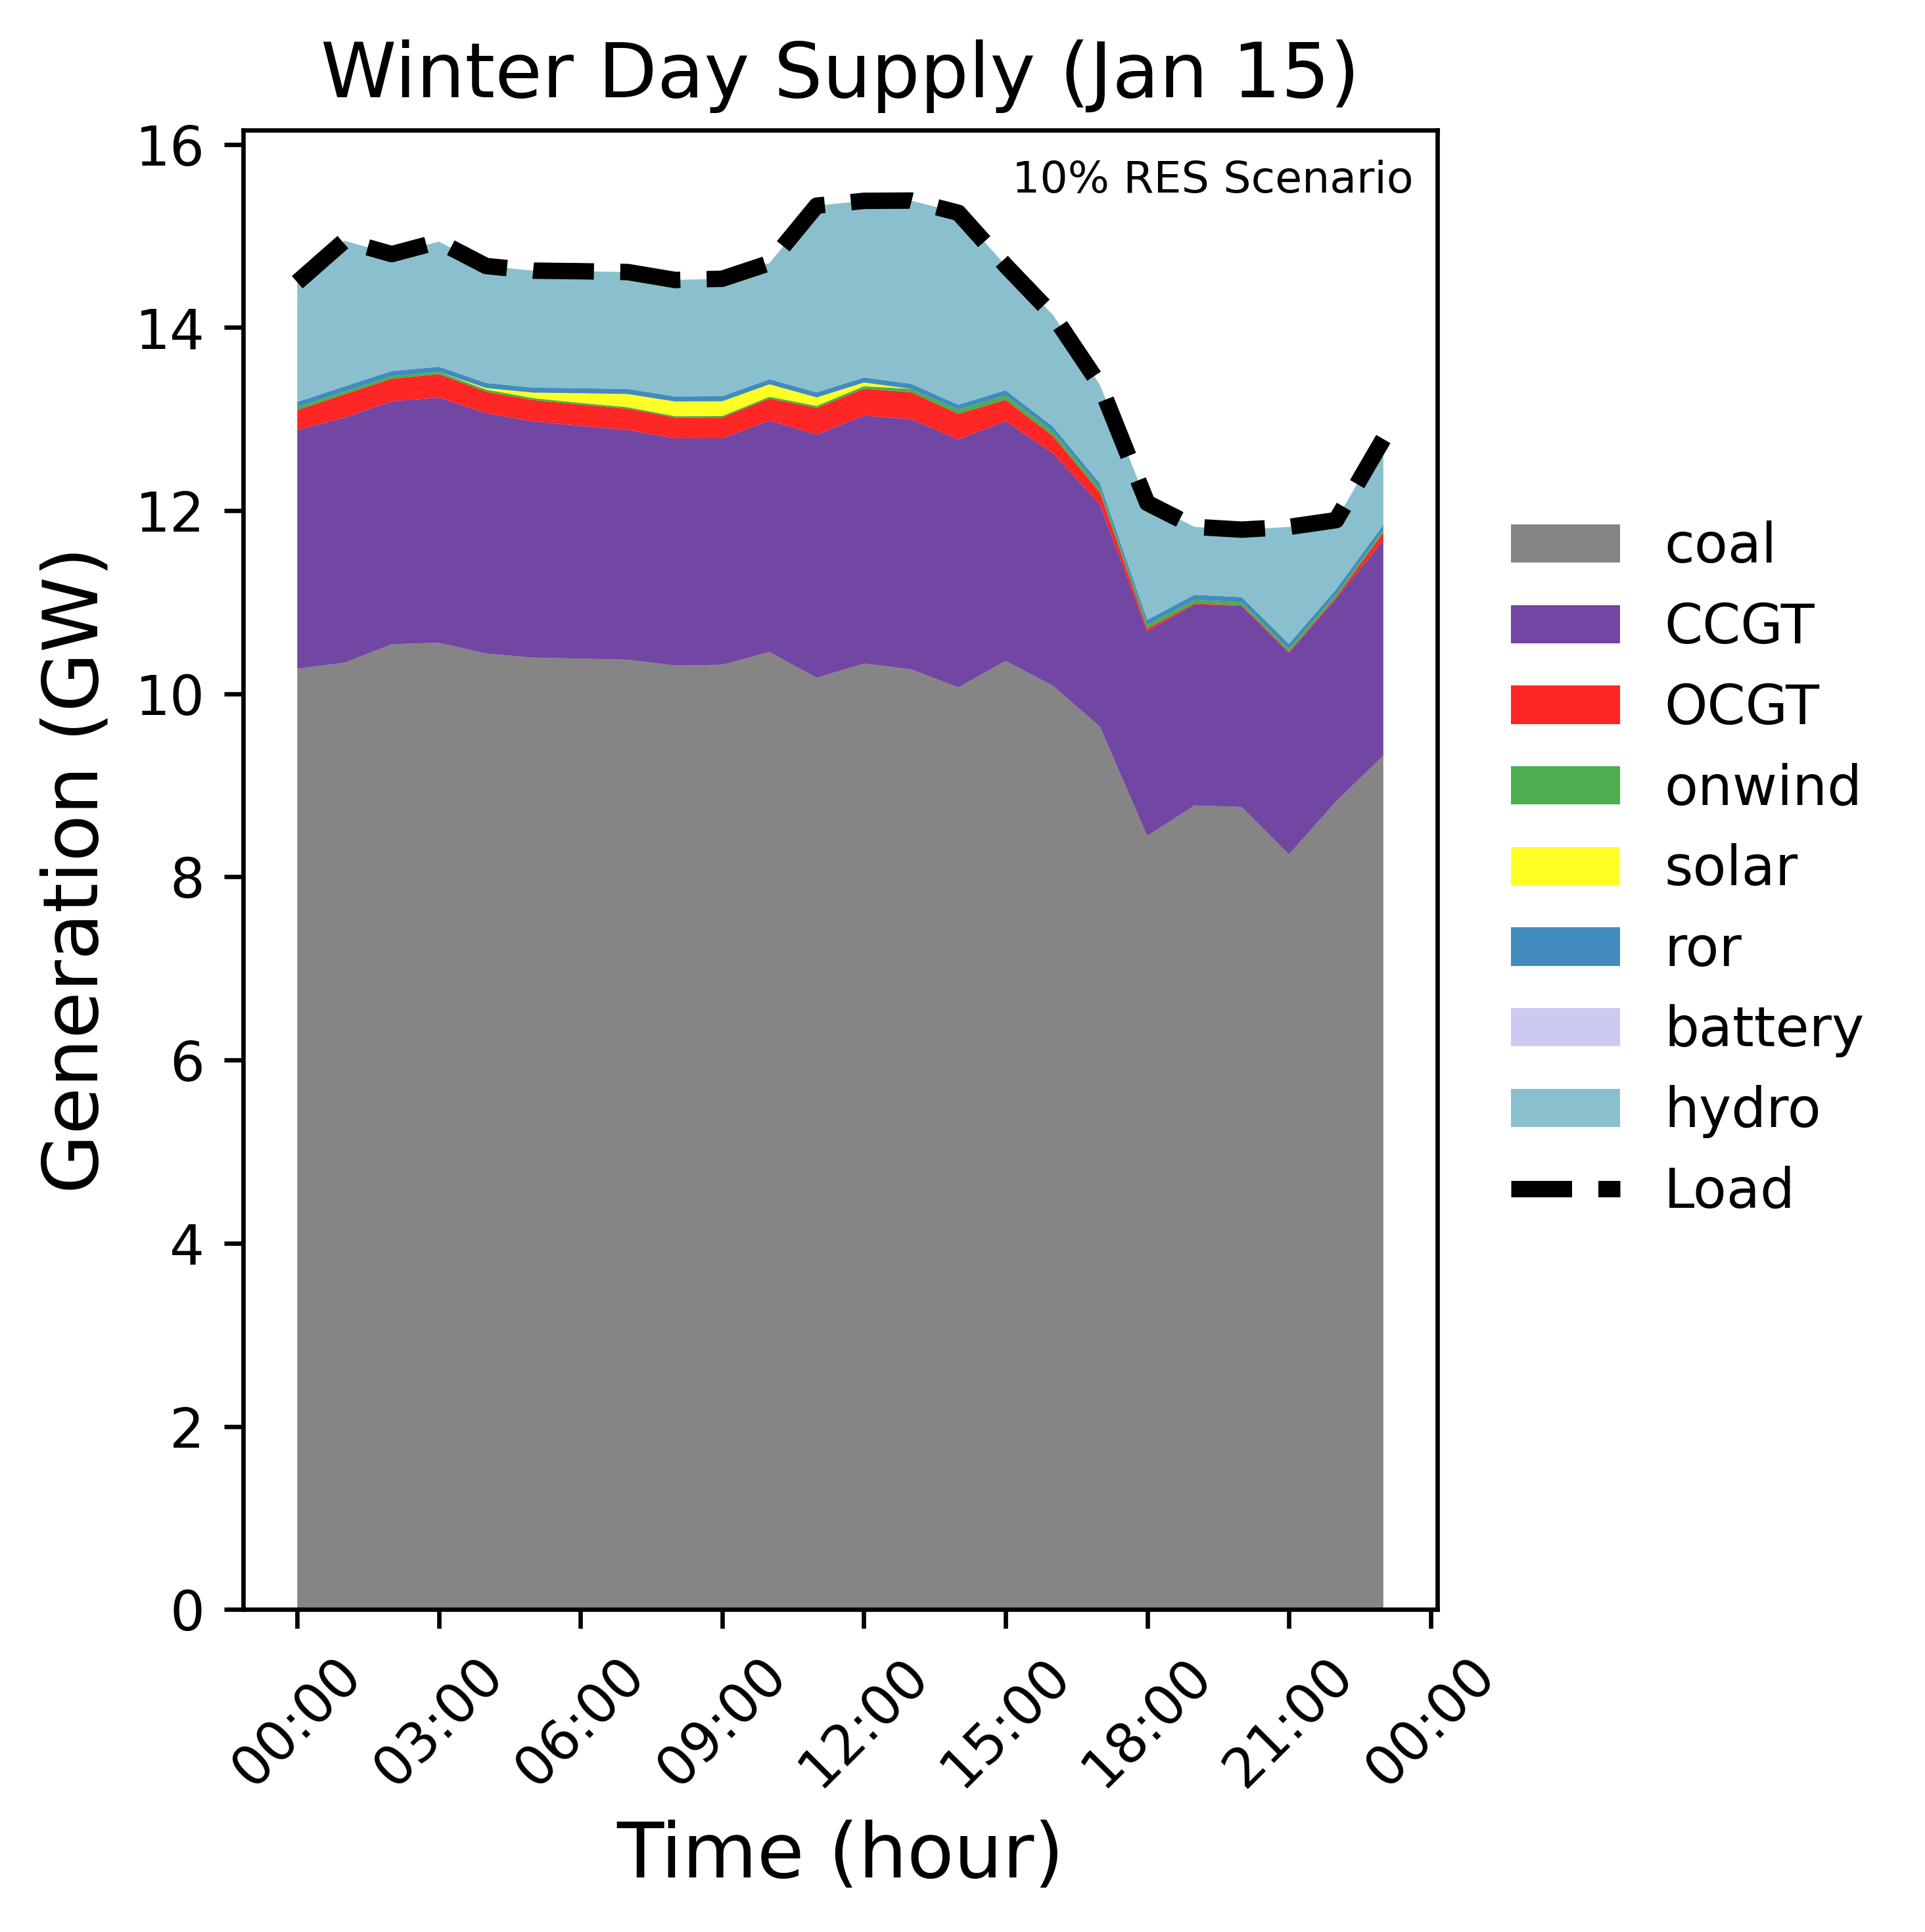

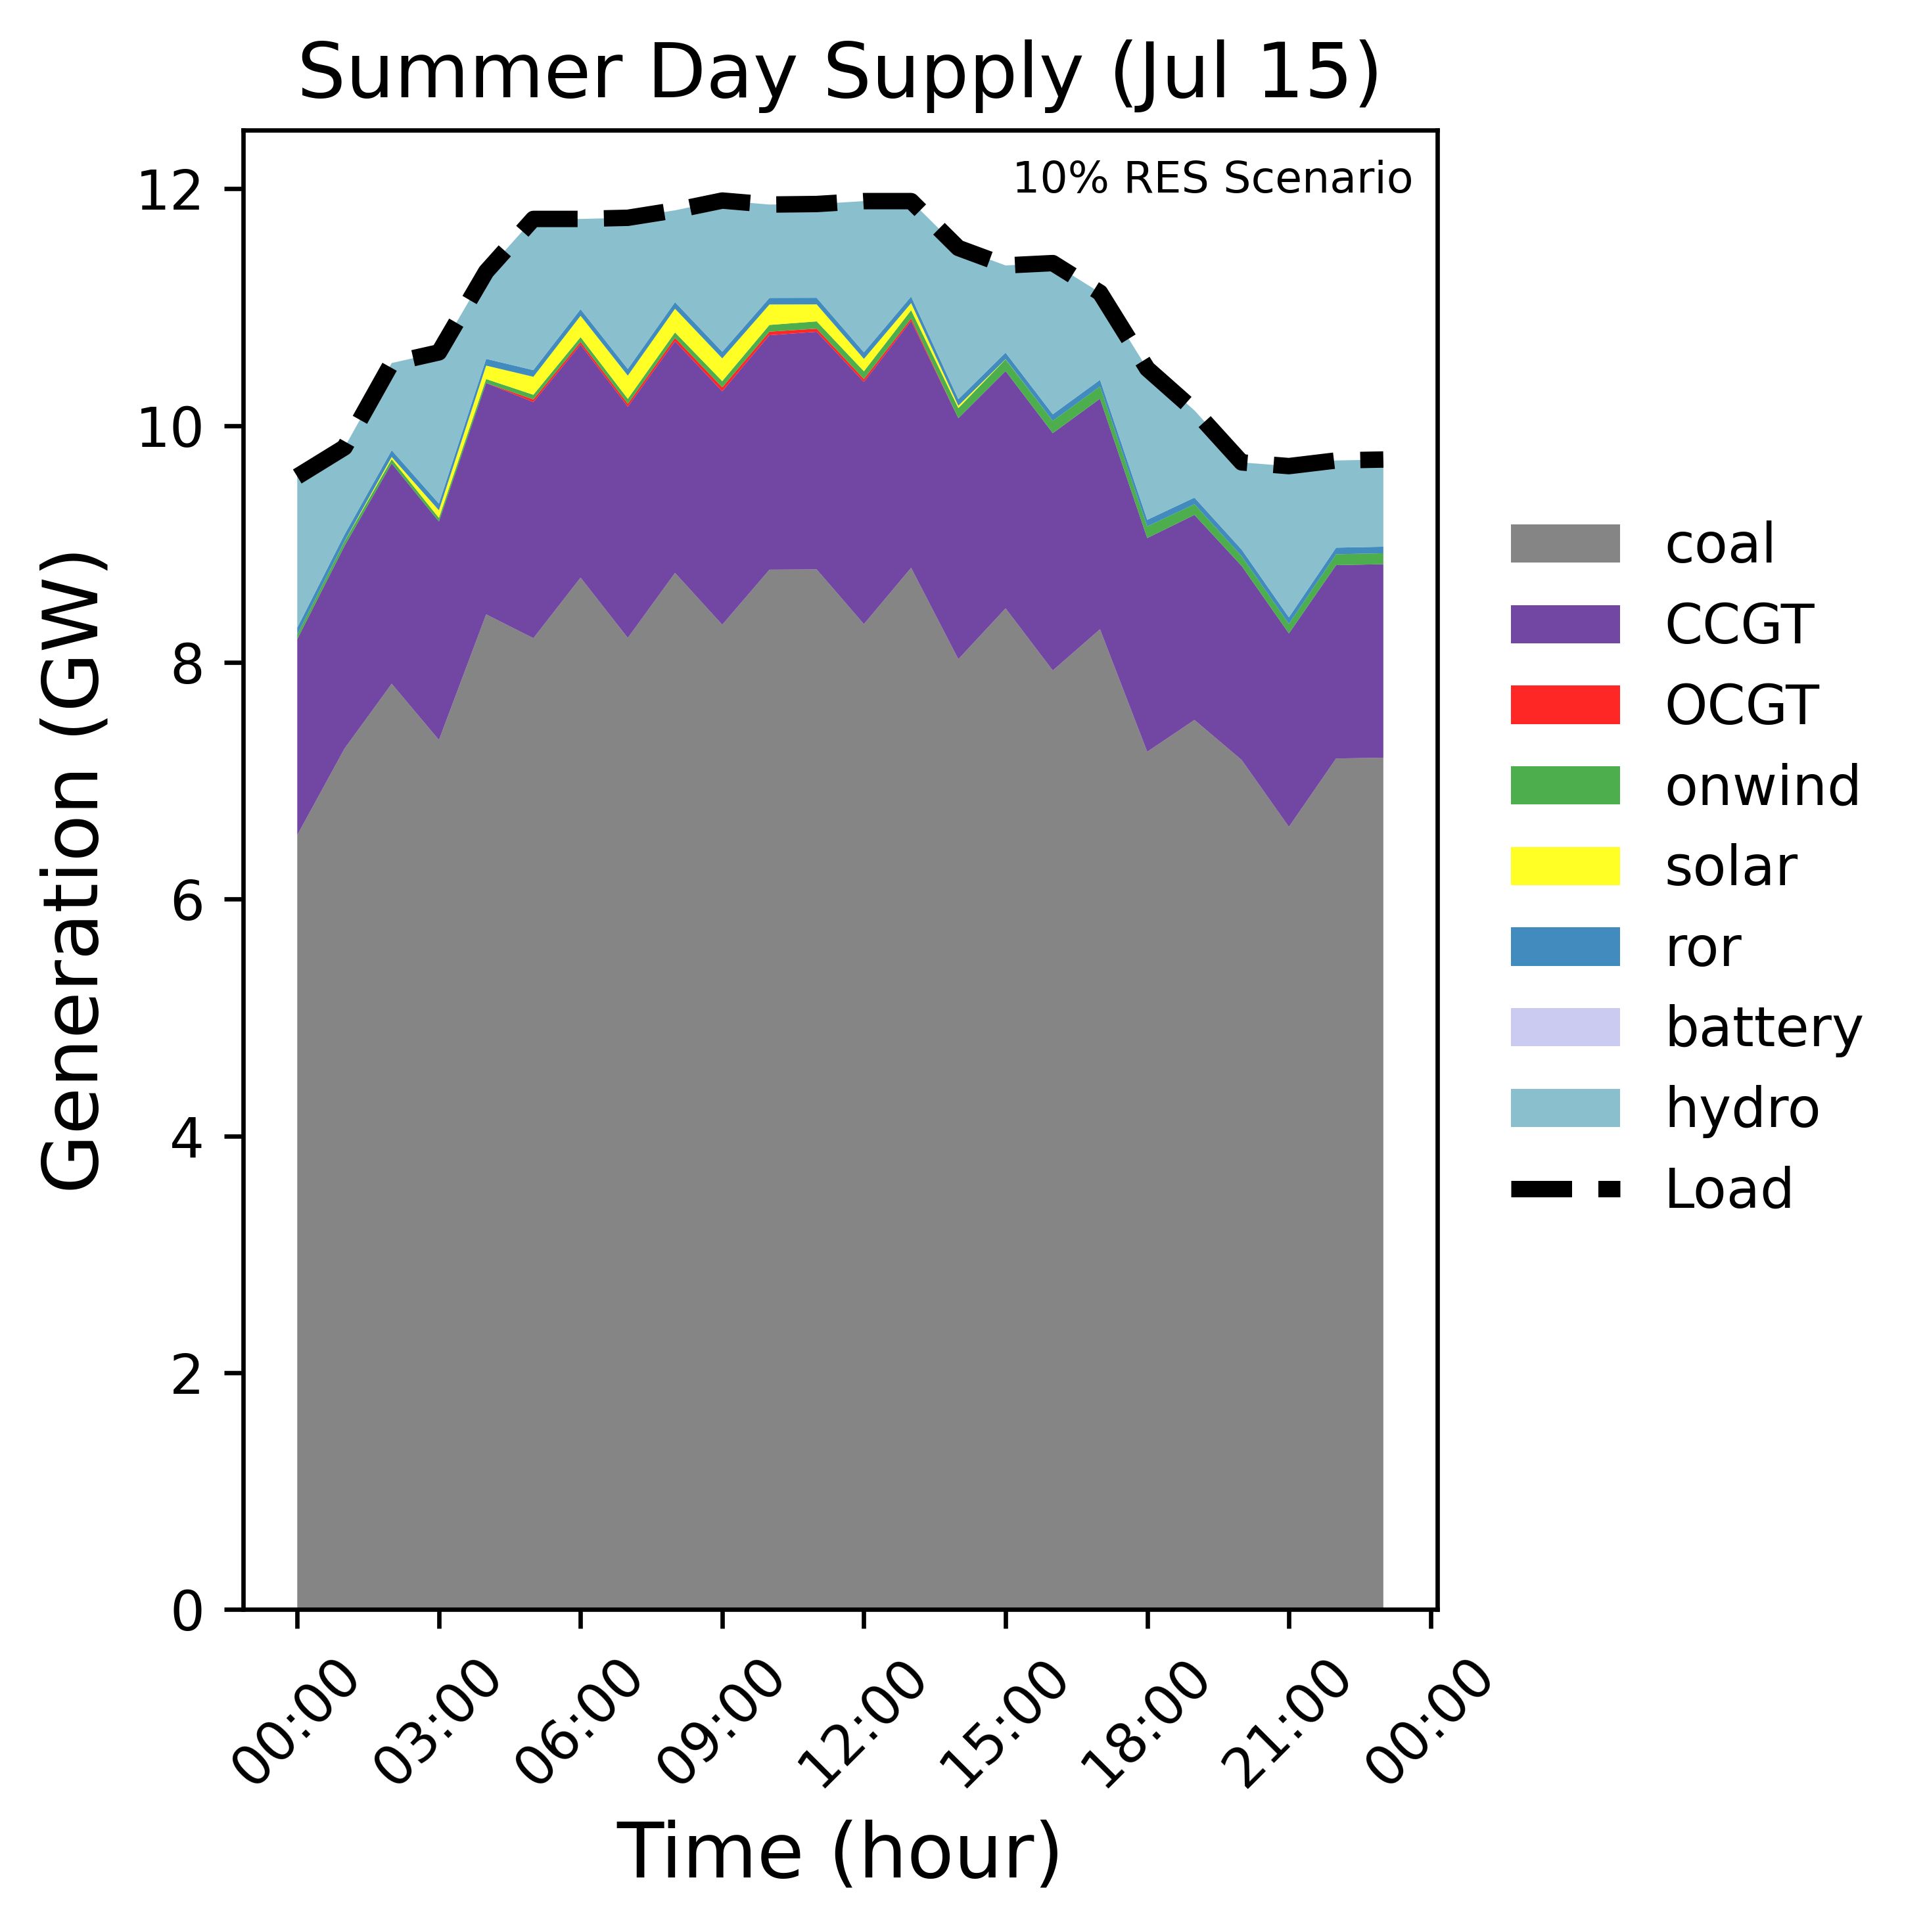

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import pandas as pd
import pypsa

mpl.rcParams['figure.dpi'] = 600  # High-resolution figure

# Load the network
n = pypsa.Network("elec_s_14_ec_lv1.0_RES0.1-1H_dle.nc")

# Target days
winter_day = pd.to_datetime("2018-01-15")
summer_day = pd.to_datetime("2018-07-15")

# Extract hourly snapshots
winter_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == winter_day.strftime('%Y-%m-%d')]
summer_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == summer_day.strftime('%Y-%m-%d')]

# Retrieve data
load = n.loads_t.p_set.sum(axis=1)
gen = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum()
storage_gen = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum()


# Define carriers to include
selected_carriers = ['coal', 'CCGT', 'OCGT', 'onwind', 'solar', 'ror']
selected_storages = ['battery', 'hydro']
available_gen = [c for c in selected_carriers if c in gen.columns]
available_storages = [c for c in selected_storages if c in storage_gen.columns]

# Color map
color_map = {
    "coal": "#707070",     # Dark gray
    "CCGT": "#592693",     # Purple
    "OCGT": "#FF0000",     # Red
    "onwind": "#2ca02c",   # Green
    "ror": "#1f77b4",      # Blue-green
    "solar": "#ffff00",    # Yellow
    "battery": "#c2c2f0",  # Light purple
    "hydro": "#76b5c5"     # Light blue
}

# Prepare daily dataframe
def prepare_day_df(hours):
    df = pd.DataFrame(index=hours)
    df["Load"] = load.loc[hours].values
    for c in available_gen:
        df[c] = gen[c].loc[hours].values
    for s in available_storages:
        df[s] = storage_gen[s].loc[hours].values
    return df

# Plotting function with enhanced graph formatting
def plot_day(df, title):
    fig, ax = plt.subplots(figsize=(5, 5))
    stack = [c for c in df.columns if c != "Load"]
    colors = [color_map.get(c, "#cccccc") for c in stack]

    ax.stackplot(df.index, [df[c] for c in stack], labels=stack, colors=colors, alpha=0.85)
    line1, = ax.plot(df.index, df["Load"], '--', color='black', linewidth=3, label="Load", zorder=10)

    # Time axis formatting
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.xticks(rotation=45)

    # Y-axis formatting
    scale_y = 1e3
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / scale_y)))

    ax.set_ylabel('Generation (GW)', fontsize=14)
    ax.set_xlabel('Time (hour)', fontsize=14)
    ax.set_title(title, fontsize=14)
    # ax.set_title(f"{title}\n(30% Renewable Energy Scenario)", fontsize=14)


    ax.set_facecolor('white')
    plt.grid(False)
    # plt.legend(loc='upper right', fontsize=8)
    ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10, frameon=False)
    plt.tight_layout()
    ax.text(
        0.98, 0.98,
        "10% RES Scenario",
        transform=ax.transAxes,
        fontsize=8,
        ha='right',
        va='top',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)
    )
    plt.show()

# Prepare and plot
df_winter = prepare_day_df(winter_hours)
df_summer = prepare_day_df(summer_hours)

plot_day(df_winter, "Winter Day Supply (Jan 15)")
plot_day(df_summer, "Summer Day Supply (Jul 15)")


c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setti

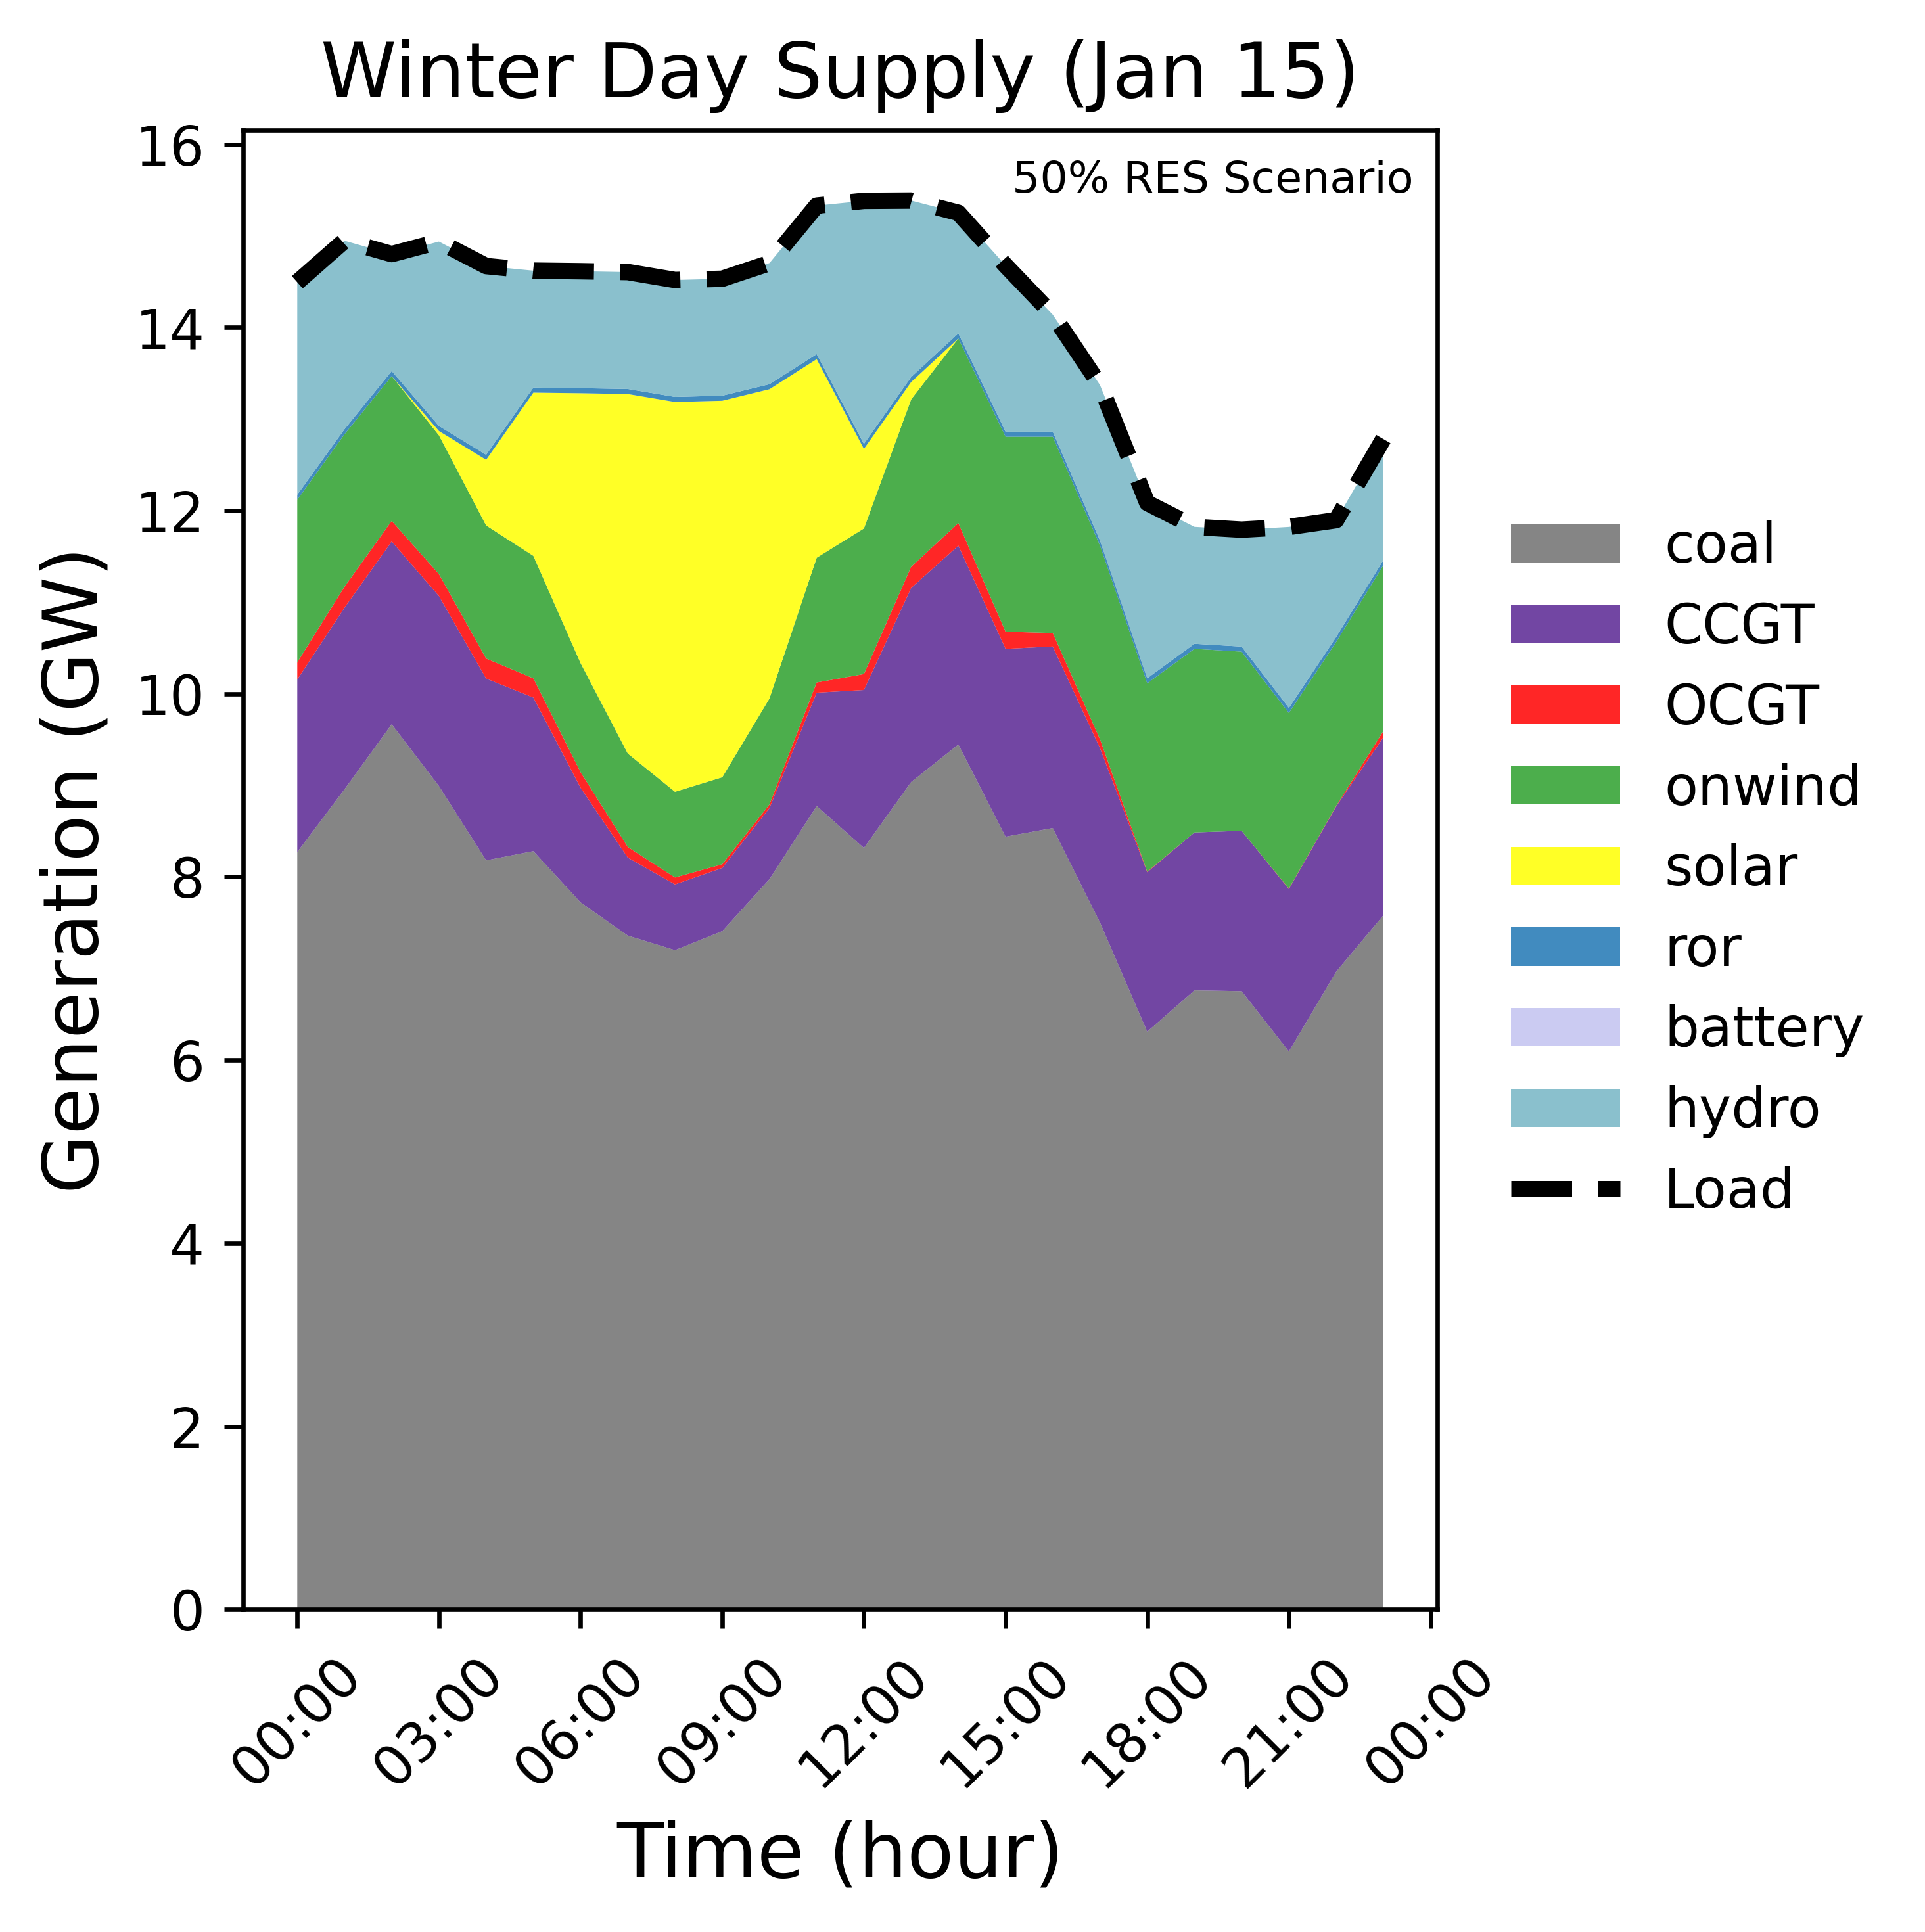

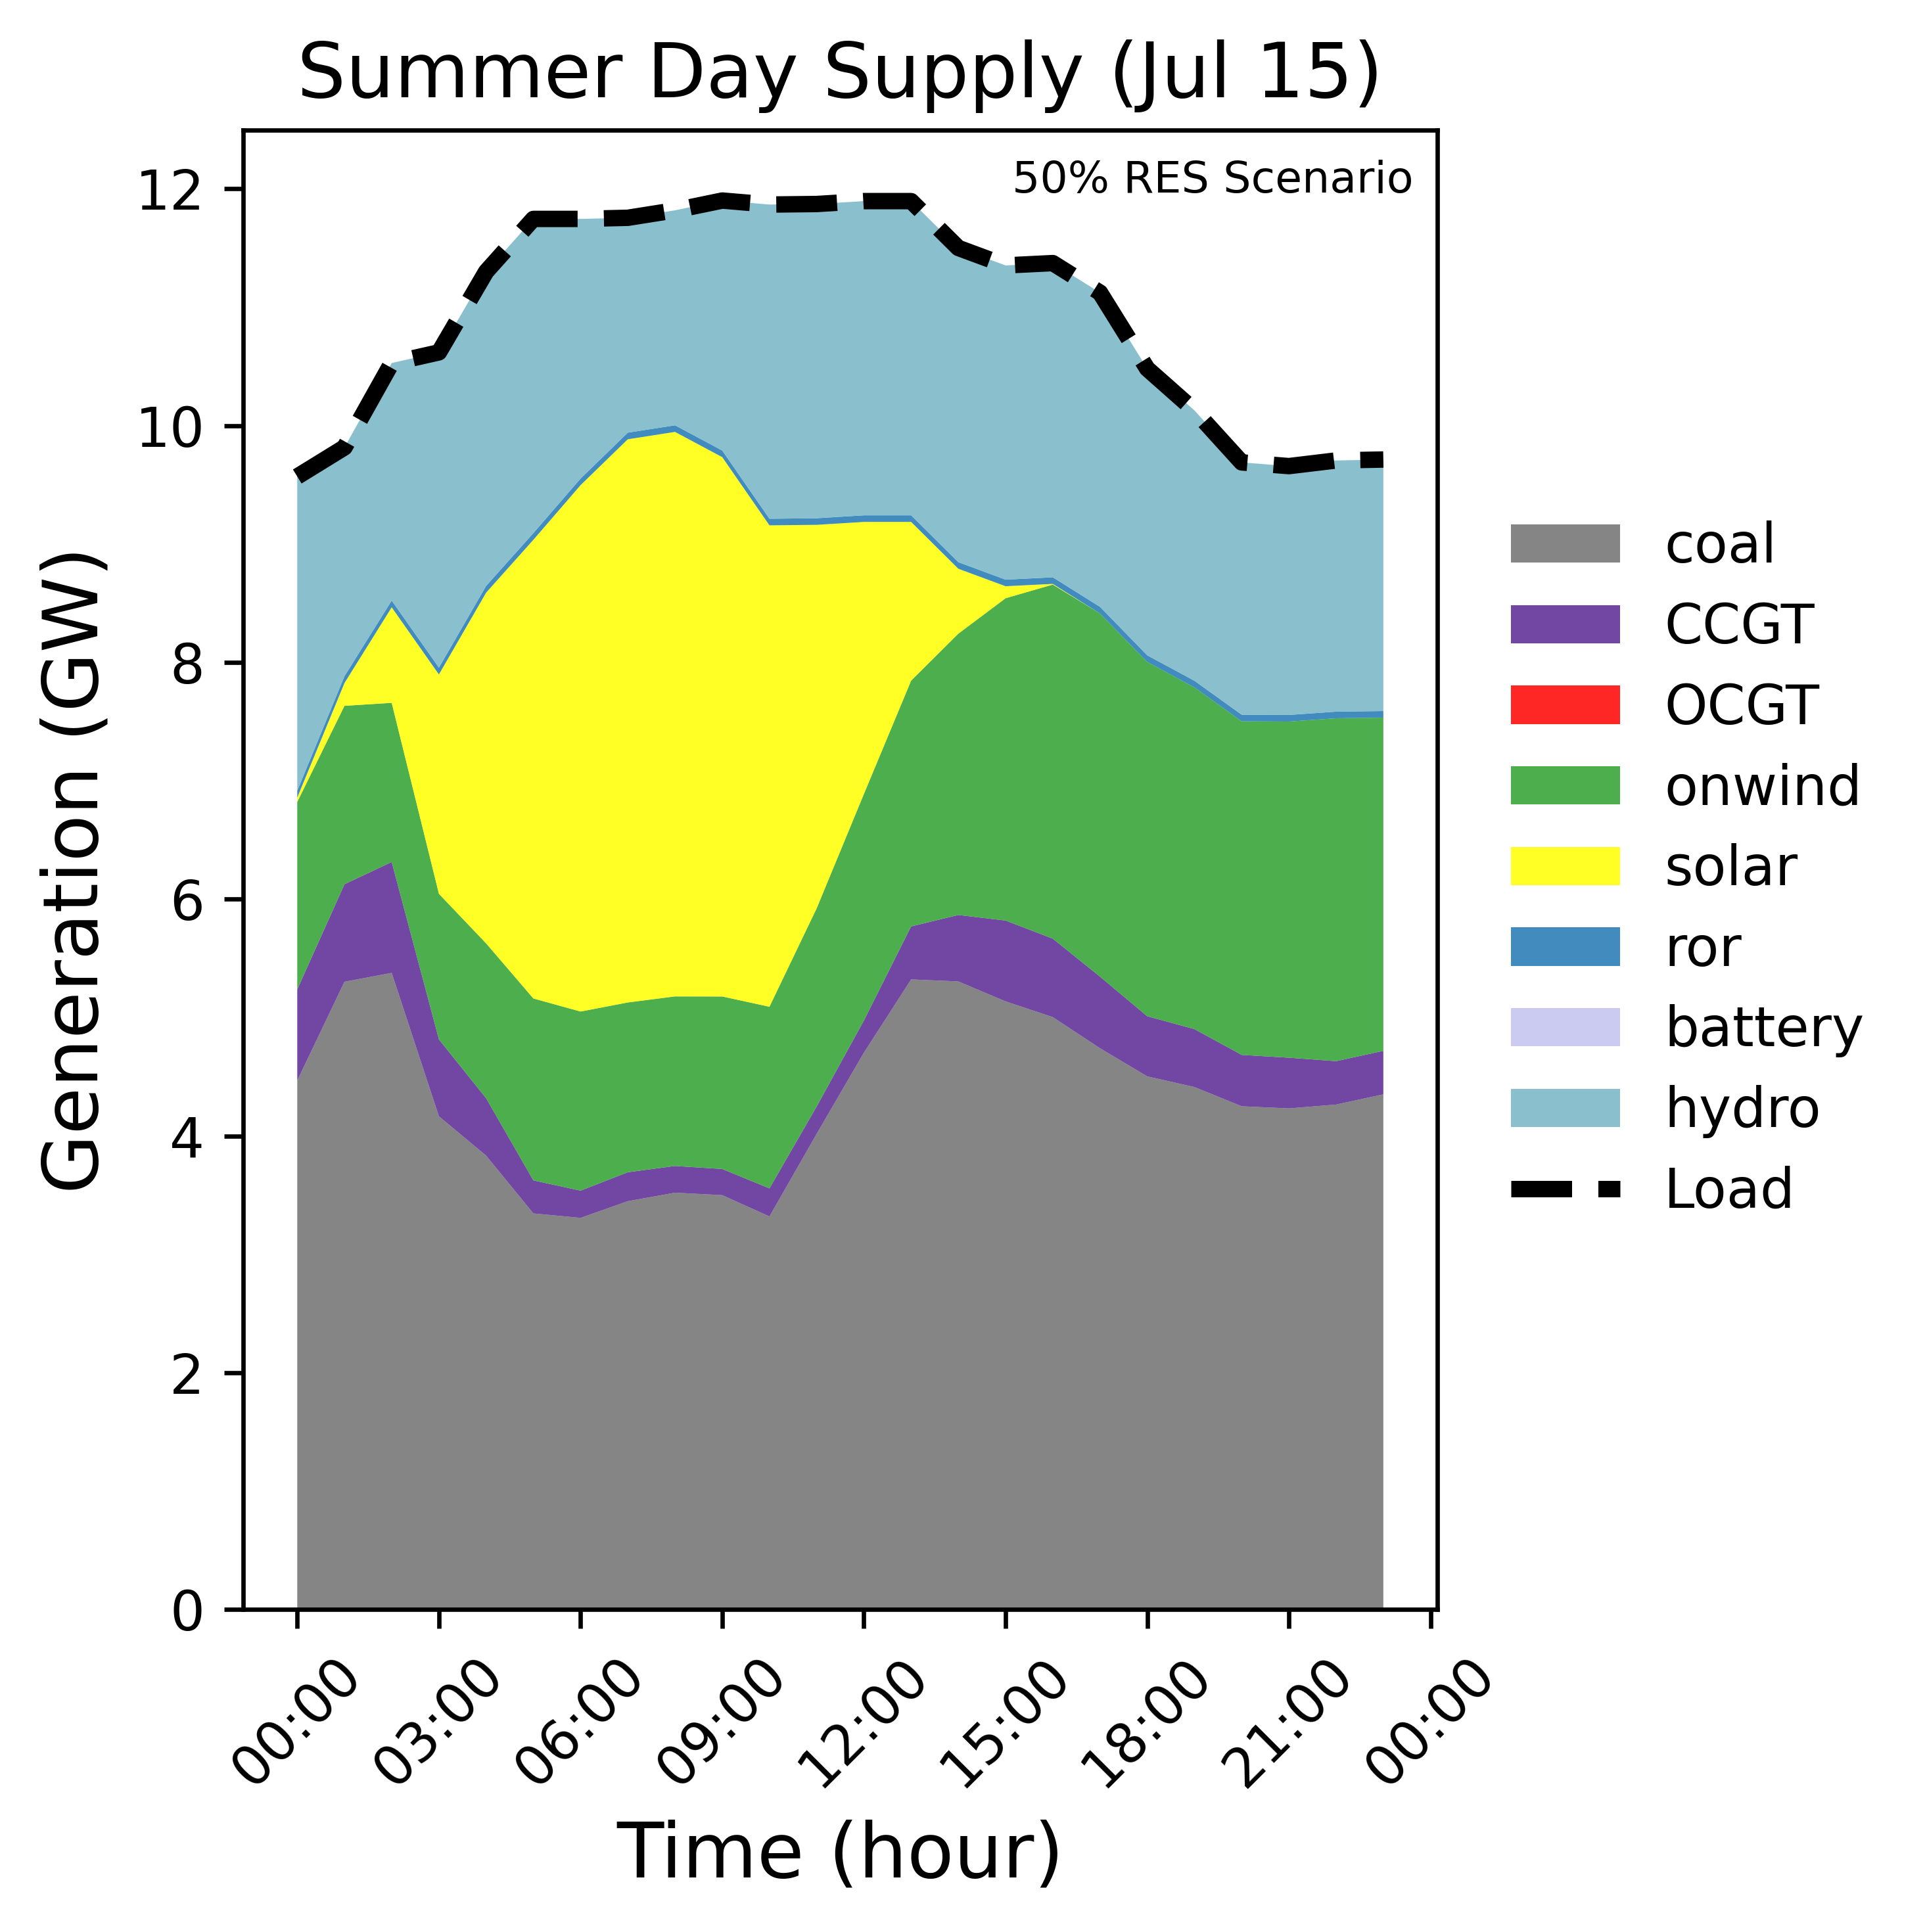

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import pandas as pd
import pypsa

mpl.rcParams['figure.dpi'] = 600  # High-resolution figure

# Load the network
n = pypsa.Network("elec_s_14_ec_lv1.0_RES0.5-1H_dle.nc")

# Target days
winter_day = pd.to_datetime("2018-01-15")
summer_day = pd.to_datetime("2018-07-15")

# Extract hourly snapshots
winter_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == winter_day.strftime('%Y-%m-%d')]
summer_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == summer_day.strftime('%Y-%m-%d')]

# Retrieve data
load = n.loads_t.p_set.sum(axis=1)
gen = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum()
storage_gen = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum()

# Define carriers to include
selected_carriers = ['coal', 'CCGT', 'OCGT', 'onwind', 'solar', 'ror']
selected_storages = ['battery', 'hydro']
available_gen = [c for c in selected_carriers if c in gen.columns]
available_storages = [c for c in selected_storages if c in storage_gen.columns]

# Color map
color_map = {
    "coal": "#707070",     # Dark gray
    "CCGT": "#592693",     # Purple
    "OCGT": "#FF0000",     # Red
    "onwind": "#2ca02c",   # Green
    "ror": "#1f77b4",      # Blue-green
    "solar": "#ffff00",    # Yellow
    "battery": "#c2c2f0",  # Light purple
    "hydro": "#76b5c5"     # Light blue
}

# Prepare daily dataframe
def prepare_day_df(hours):
    df = pd.DataFrame(index=hours)
    df["Load"] = load.loc[hours].values
    for c in available_gen:
        df[c] = gen[c].loc[hours].values
    for s in available_storages:
        df[s] = storage_gen[s].loc[hours].values
    return df

# Plotting function with enhanced graph formatting
def plot_day(df, title):
    fig, ax = plt.subplots(figsize=(5, 5))
    stack = [c for c in df.columns if c != "Load"]
    colors = [color_map.get(c, "#cccccc") for c in stack]

    ax.stackplot(df.index, [df[c] for c in stack], labels=stack, colors=colors, alpha=0.85)
    line1, = ax.plot(df.index, df["Load"], '--', color='black', linewidth=3, label="Load", zorder=10)

    # Time axis formatting
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.xticks(rotation=45)

    # Y-axis formatting
    scale_y = 1e3
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / scale_y)))

    ax.set_ylabel('Generation (GW)', fontsize=14)
    ax.set_xlabel('Time (hour)', fontsize=14)
    ax.set_title(title, fontsize=14)
    # ax.set_title(f"{title}\n(30% Renewable Energy Scenario)", fontsize=14)


    ax.set_facecolor('white')
    plt.grid(False)
    # plt.legend(loc='upper right', fontsize=8)
    ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10, frameon=False)
    plt.tight_layout()
    ax.text(
        0.98, 0.98,
        "50% RES Scenario",
        transform=ax.transAxes,
        fontsize=8,
        ha='right',
        va='top',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)
    )
    plt.show()

# Prepare and plot
df_winter = prepare_day_df(winter_hours)
df_summer = prepare_day_df(summer_hours)

plot_day(df_winter, "Winter Day Supply (Jan 15)")
plot_day(df_summer, "Summer Day Supply (Jul 15)")


In [10]:
import pypsa
import pandas as pd

# Load the network
n = pypsa.Network("elec_s_14_ec_lv1.0_RES0.1-1H_dle.nc")

# Define the target dates
winter_day = pd.to_datetime("2018-01-15")
summer_day = pd.to_datetime("2018-07-15")

# Extract hours for each day
winter_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == winter_day.strftime('%Y-%m-%d')]
summer_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == summer_day.strftime('%Y-%m-%d')]

# Get data
load = n.loads_t.p_set.sum(axis=1)
gen = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum()
storage = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum()

# Define carriers
selected_carriers = ['coal', 'CCGT', 'OCGT', 'onwind', 'solar', 'ror']
selected_storages = ['battery', 'hydro']

available_gen = [c for c in selected_carriers if c in gen.columns]
available_storages = [c for c in selected_storages if c in storage.columns]

# Prepare function
def prepare_day_df(hours):
    df = pd.DataFrame(index=hours)
    df["Load"] = load.loc[hours].values
    for c in available_gen:
        df[c] = gen[c].loc[hours].values
    for s in available_storages:
        df[s] = storage[s].loc[hours].values
    return df

# Build daily tables
df_winter = prepare_day_df(winter_hours)
df_summer = prepare_day_df(summer_hours)

# Compute total generation per source
summary = pd.concat([
    df_winter.sum().rename("Winter Day (Jan 15)"),
    df_summer.sum().rename("Summer Day (Jul 15)")
], axis=1)

print(summary)


c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setti

         Winter Day (Jan 15)  Summer Day (Jul 15)
Load           337180.295875        263052.861011
coal           237695.423259        189901.916995
CCGT            60128.674387         45051.164686
OCGT             4473.240045           231.488498
onwind            725.111356          1578.588510
solar             913.887359          1624.119583
ror              1322.955183          1343.741710
battery             0.000000             0.000000
hydro           31921.004269         23321.841040


C:\Users\bakht\AppData\Local\Temp\ipykernel_9152\1974258807.py:17: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\bakht\AppData\Local\Temp\ipykernel_9152\1974258807.py:18: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



In [11]:
import pypsa
import pandas as pd

# Load the network
n = pypsa.Network("elec_s_14_ec_lv1.0_RES0.3-1H_dle.nc")

# Define the target dates
winter_day = pd.to_datetime("2018-01-15")
summer_day = pd.to_datetime("2018-07-15")

# Extract hours for each day
winter_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == winter_day.strftime('%Y-%m-%d')]
summer_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == summer_day.strftime('%Y-%m-%d')]

# Get data
load = n.loads_t.p_set.sum(axis=1)
gen = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum()
storage = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum()

# Define carriers
selected_carriers = ['coal', 'CCGT', 'OCGT', 'onwind', 'solar', 'ror']
selected_storages = ['battery', 'hydro']

available_gen = [c for c in selected_carriers if c in gen.columns]
available_storages = [c for c in selected_storages if c in storage.columns]

# Prepare function
def prepare_day_df(hours):
    df = pd.DataFrame(index=hours)
    df["Load"] = load.loc[hours].values
    for c in available_gen:
        df[c] = gen[c].loc[hours].values
    for s in available_storages:
        df[s] = storage[s].loc[hours].values
    return df

# Build daily tables
df_winter = prepare_day_df(winter_hours)
df_summer = prepare_day_df(summer_hours)

# Compute total generation per source
summary = pd.concat([
    df_winter.sum().rename("Winter Day (Jan 15)"),
    df_summer.sum().rename("Summer Day (Jul 15)")
], axis=1)

print(summary)


c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setti

         Winter Day (Jan 15)  Summer Day (Jul 15)
Load           337180.295875        263052.861011
coal           225596.342408        140238.934929
CCGT            43901.833593         17136.795349
OCGT             3628.091197             0.000000
onwind          10302.410389         21558.533770
solar           12767.471077         23674.940098
ror              1322.955183          1343.741710
battery             0.000000             0.000000
hydro           39661.192012         59099.915166


C:\Users\bakht\AppData\Local\Temp\ipykernel_9152\2709918155.py:17: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\bakht\AppData\Local\Temp\ipykernel_9152\2709918155.py:18: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



In [16]:
import pypsa
import pandas as pd

# Load the network
n = pypsa.Network("elec_s_14_ec_lv1.0_RES0.5-1H_dle.nc")

# Define the target dates
winter_day = pd.to_datetime("2018-01-15")
summer_day = pd.to_datetime("2018-07-15")

# Extract hours for each day
winter_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == winter_day.strftime('%Y-%m-%d')]
summer_hours = n.snapshots[n.snapshots.strftime('%Y-%m-%d') == summer_day.strftime('%Y-%m-%d')]

# Get data
load = n.loads_t.p_set.sum(axis=1)
gen = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum()
storage = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum()

# Define carriers
selected_carriers = ['coal', 'CCGT', 'OCGT', 'onwind', 'solar', 'ror']
selected_storages = ['battery', 'hydro']

available_gen = [c for c in selected_carriers if c in gen.columns]
available_storages = [c for c in selected_storages if c in storage.columns]

# Prepare function
def prepare_day_df(hours):
    df = pd.DataFrame(index=hours)
    df["Load"] = load.loc[hours].values
    for c in available_gen:
        df[c] = gen[c].loc[hours].values
    for s in available_storages:
        df[s] = storage[s].loc[hours].values
    return df

# Build daily tables
df_winter = prepare_day_df(winter_hours)
df_summer = prepare_day_df(summer_hours)

# Compute total generation per source
summary = pd.concat([
    df_winter.sum().rename("Winter Day (Jan 15)"),
    df_summer.sum().rename("Summer Day (Jul 15)")
], axis=1)

print(summary)


c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setti

         Winter Day (Jan 15)  Summer Day (Jul 15)
Load           337180.295875        263052.861011
coal           190520.722618        103838.103343
CCGT            39820.471429         11155.457219
OCGT             3029.006658             0.000000
onwind          39303.982062         49946.487353
solar           24390.480298         39853.821632
ror              1322.955183          1343.741710
battery             0.000000             0.000000
hydro           38792.677609         56915.249765


C:\Users\bakht\AppData\Local\Temp\ipykernel_9152\2950841947.py:17: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\bakht\AppData\Local\Temp\ipykernel_9152\2950841947.py:18: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

